# Aula 06 - Exploração e filtragem de dados

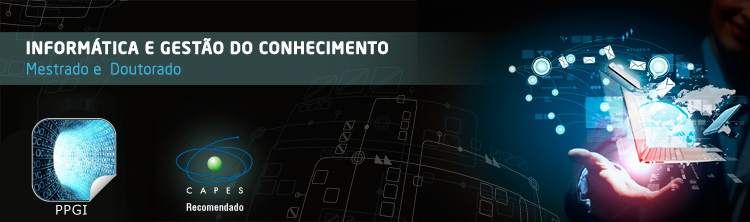

<p style="text-align: center;"><a href="https://www.uninove.br/cursos/mestrado-e-doutorado/presencial/mestrado-e-doutorado-em-inform%C3%A1tica-e-gest%C3%A3o-do-conhecimento"><b>Conheça o Programa de Mestrado e Doutorado em Informática e Gestão do Conhecimento da UNINOVE</b></a></p>

> **Resumo da aula**: Vamos importar algumas bibliotecas comuns de manipulação e visualização de dados (`missingno`, `mitosheet`, `pandas_profiling`, etc). Vamos carregar diferentes tipos de arquivos e manipular dados usando diversas ferramentas nativas do `pandas` e depois usando `mitosheet`. Além disto, vamos analisar os quadros de dados com `missingno` para analisar dados faltantes, `pandas_profiling` para ter uma noção das variáveis e `sweetviz` para visualizar características do quado de dados.

# Índice

[Introdução à manipulação de dados](#manipulacao) <br>
[Biblioteca `missingno`](#missingno) <br>
[Biblioteca `pandas_profiling`](#pandas_profiling) <br>
[Biblioteca `mitosheet`](#mitosheet) <br>
[Biblioteca `dtale`](#dtale) <br>
[Biblioteca `sweetviz`](#sweetviz) <br>
[Carregando as bibliotecas](#bibliotecas) <br>
[Analisando o quadro de dados com `pandas`, `pandas_profiling` e `sweetviz`](#analisando) <br>
[Realizando seleções e filtragens](#selecoes) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Realizando seleções e filtragens com filtro booleano](#booleano) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Realizando seleções e filtragens com `df.query()`](#query) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Realizando seleções e filtragens com `df.where()` e `df.mask()`](#where) <br>
[Ordenando dados com `.sort_values()`](#sort_values) <br>
[Juntando quadros de dados](#juntando) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Juntando quadros de dados com `pd.concat()` e `df.append()`](#concat) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Juntando quadros de dados com `pd.merge()`](#merge) <br>
[Verificar dados faltantes](#faltantes) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Preenchendo dados faltantes com medidas centrais](#faltantes_centrais) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Preenchendo dados faltantes com medidas valores específicos](#faltantes_especificos) <br>
[Alterando quadros de dados](#alterando_quadros) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Alterando quadros de dados com `crosstab`](#crosstab) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Alterando quadros de dados com `groupby`](#groupby) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Alterando quadros de dados com `pivot_table`](#pivot) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[Alterando quadros de dados com `stack` e `unstack`](#stack) <br>
[Alterando estilo visual de quadros de dados](#styling) <br>
[Alterando quadros com `mitosheet`](#mitosheet_uso) <br>
[Alterando quadros com `dtale`](#dtale_uso) <br>
[Outros pacotes como alternativas a pandas e/ou para `big data`](#outros)
[Bibliografia adicional](#bibliografia) <br>
<br>

<a name="conteudo">
    <H1>Conteúdo</H1>
</a>

Nesta disciplina, estão previstos 12 encontros, divididos da seguinte maneira:

1. ~~Apresentação da disciplina~~
2. ~~Ciência de dados, *analytics*; Revisão de dados~~
3. ~~Introdução à programação em `Python` (1)~~
4. ~~Introdução à programação em `Python` (2)~~
5. ~~Importação e limpeza de dados~~
6. ~~Exploração e filtragem de dados~~
7. Manipulação para análise de dados
8. Fundamentos de estatística para análise exploratória de dados
9. Visualização de dados
10. Apresentação de projetos (alunos)
11. Apresentação de projetos (alunos)
12. Apresentação de projetos (alunos) e encerramento

O conteúdo / distribuição dos mesmos pode sofrer alterações ao longo da disciplina

<a name="manipulacao">
    <H1>Introdução à manipulação de dados</H1>
</a>

Agora que já vimos o básico de operações do `pandas` podemos começar a realizar operações mais complexas de filtragens e manipulações nos quadros de dados. Em muitos aspectos, é possível realizar as mesmas operações do `pandas` que em outas ferramentas de seleção de dados como `SQL`. Você não precisa conhecer `SQL` para ver que ambos têm (apesar de diferenças de sintaxe) capacidades semelhantes:

`SQL`:
```sql
from cidades
where tamanho = 'maiores200' and regiao = 'sudeste'
group by estado
select
  estado
  count(distinct date) data_emancipacao,
order by data_emancipacao
limit 10
```
`Python`:
```python
(cidades
 .query("tamanho == 'maiores200' and regiao == 'sudeste'")
 .groupby("estado", as_index=False)
 .agg(n_datas = ("data_emancipacao", "nunique"))
 .sort_values(by = "n_datas", ascending = False)
 .head(10
)

```

O nosso objetivo até o fim da aula é aprender formas iniciais de filtrar, alterar juntar, separar e sumarizar dados com `pandas` e outras bibliotecas.

Antes de continuar com as operações de manipulação de dados, vamos instalar algumas bibliotecas novas:

* `missingno`
* `pandas profiling`
* `sweetviz`
* `mitosheet`
* `dtale`

<a name="missingno">
    <H1>Biblioteca <code>missingno</code></H1>
</a>

<img src="data/missingno.png" width=500>

A biblioteca `missingno` (em inglês *missing number* ou *número faltante*) tem como propósito oferecer diversas formas de análise visual de dados faltantes em quadros de dados. A biblioteca dispõe de diversas visualizações interessantes, mas particularmente há três mais úteis (na minha opinião), histograma por série; barras com faltas localizadas; e correlação entre colunas com dados faltantes.

Essa biblioteca cria as visualizações com base no `matplotlib`, então não se esqueça de importá-lo também e definir a apresentação dos gráficos dentro do próprio `Jupyter`:

```python
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
```

> **PS**: Não confundir com o [Pokémon `MissingNo`](https://bulbapedia.bulbagarden.net/wiki/MissingNo.)

<a name="pandas_profiling">
    <H1>Biblioteca <code>pandas_profiling</code></H1>
</a>

<img src="data/pandas_profiling.png" width=500>

A biblioteca `pandas_profiling` é muito útil para verificar seu quadro de dados. Ela fornece uma visão geral de cada série, com estatísticas descritivas, números faltantes (como no `missingno`, mas com menos detalhes nessa área), correlações entre variáveis e mais.

A utilização do `pandas_profiling` pode ajudar a ter um diagnóstico do seu quadro de dados para limpeza e manipulação.

<a name="sweetviz">
    <H1>Biblioteca <code>sweetviz</code></H1>
</a>

<img src="data/sweetviz.png" width=500>

A biblioteca `sweetviz` tem um propósito semelhante ao `pandas_profiling`, i.e. simplificar a análise das colunas de um quadro de dados.

```python
!pip install sweetviz
```

<a name="dtale">
    <H1>Biblioteca <code>dtale</code></H1>
</a>

<img src="data/dtale.png" width=450>

A biblioteca `dtale` tem um uso similar ao `mitosheet`, permitindo fazer alterações, agregações, transformações e mais de por meio de interface gráfica. Da mesma forma como no caso do `mitosheet`, é melhor primeiro aprender a fazer na mão, antes de usar. Por outro lado, é muito prático quando for preciso!

```python
!pip install dtale
```

<a name="mitosheet">
    <H1>Biblioteca <code>mitosheet</code></H1>
</a>

<img src="data/mito.svg">

A biblioteca `mitosheet` é muito útil para fazer alterações, transformações e agregações nos seus quadros de dados. Muitas operações que vamos aprender na aula de hoje podem ser realizadas por meio de interface gráfica no `mitosheet`. Outro uso interessante dessa biblioteca é o fato de que o `mitosheet` retorna não somente os quadros com as alterações propostas, mas também o código que resultou nessas alterações.

A instalação dessa biblioteca é em duas partes - primeiro baixar e instalar o instalador, e por meio do instalador, a biblioteca:

```python
!pip install mitoinstaller
mitoinstaller install 
```

<a name="bibliotecas">
    <H1>Carregando bibliotecas</H1>
</a>

Para começar, não se esqueça de importar o `pandas` e o `numpy`:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importe `missingno` e verifique a versão:

In [2]:
import missingno as msno

In [3]:
msno.__version__

'0.4.2'

Idem para `pandas_profiling`:

In [4]:
import pandas_profiling

In [5]:
pandas_profiling.__version__

'3.0.0'

Agora, `sweetviz`:

In [6]:
import sweetviz as sv

In [7]:
sv.__version__

'2.1.3'

Idem para `mitosheet`:

In [8]:
import mitosheet

In [9]:
mitosheet.__version__

'0.3.145'

E também `dtale`

In [10]:
import dtale

In [11]:
#retorna erro! d-tale não tem atributo .__version__
#dtale.__version__

<a name="analisando">
    <H1>Analisando o quadro de dados com <code>pandas</code>, <code>pandas_profiling</code> e <code>sweetviz</code></H1>
</a>


Precisamos de um quadro de dados para analisar. Vamos importar o `.csv` do fim da aula passada:

In [12]:
df = pd.read_csv("data/contas_limpo.csv", 
                 encoding="UTF-8")
df

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [13]:
df.dtypes

cliente_id              int64
dia_e_horario          object
total_da_conta        float64
promocao                 bool
cupom                 float64
compras_anteriores      int64
cidade                 object
estado                 object
total_sem_desconto    float64
conta_cat              object
dtype: object


Antes de fazermos alterações, vamos explorar as colunas do quadro de dados. Vamos começar com o `pandas`.

Você já conhece o `.shape` (linhas, colunas):

In [14]:
df.shape

(9, 10)

Para ver os valores de cada série, use `.value_counts()`:

In [15]:
df.promocao.value_counts()

True     5
False    4
Name: promocao, dtype: int64

In [16]:
df.estado.value_counts()

SP    4
RJ    3
MG    2
Name: estado, dtype: int64

In [17]:
df.cupom.nunique()

4

Para ter uma visão geral, use `.info()`:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cliente_id          9 non-null      int64  
 1   dia_e_horario       8 non-null      object 
 2   total_da_conta      9 non-null      float64
 3   promocao            9 non-null      bool   
 4   cupom               9 non-null      float64
 5   compras_anteriores  9 non-null      int64  
 6   cidade              9 non-null      object 
 7   estado              9 non-null      object 
 8   total_sem_desconto  9 non-null      float64
 9   conta_cat           9 non-null      object 
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 785.0+ bytes


Para saber o(s) maior(es) valor(es) em uma coluna, use `.nlargest(valores, df.coluna)`. Cuidado com a sintaxe: passar `.nlargest()` numa série retorna os maiores valores da série enquando usar `.nlargest()` num quadro de dados filtra o quadro (retornando todas as colunas) contendo o maiores valores especificados:

In [19]:
df.total_da_conta.nlargest(3)

3    8936.0
6    6344.0
1    3452.0
Name: total_da_conta, dtype: float64

In [20]:
df.nlargest(3, "total_da_conta")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro


O mesmo para `.nsmallest()` que retorna os menores valores:

In [21]:
df.total_sem_desconto.nsmallest(3)

0     259.2
4     573.5
7    1082.0
Name: total_sem_desconto, dtype: float64

In [22]:
df.nsmallest(3, "total_sem_desconto")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.1,2,São Paulo,SP,259.2,barato
4,2534,2020-12-03,573.5,False,0.0,0,Osasco,SP,573.5,barato
7,6345,NaN,984.0,True,0.1,1,São Paulo,SP,1082.0,medio


E para ter uma visão geral com alguns dados estatísticos, use `.describe()`. Esse método retorna:

* `count`: valores válidos (só para numéricos)
* `mean`: média aritmética
* `std`: desvio padrão (dispersão dos dados)
* `min`: menor valor
* quartis (0.25, 0.50, 0.75): os quartis dos dados (quais valores estão nas posições que cortam os dados em quartos - i.e., um quartil é um quarto dos dados)
* `max`: maior valor

In [23]:
df.describe()

,cliente_id,total_da_conta,cupom,compras_anteriores,total_sem_desconto
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5273.777778,2945.366667,0.072222,2.000000,3180.633333
std,2334.319214,2903.548555,0.050690,1.414214,3165.959102
min,2356.000000,235.800000,0.000000,0.000000,259.200000
25%,3564.000000,984.000000,0.050000,1.000000,1082.000000
50%,5368.000000,1894.000000,0.100000,2.000000,1894.000000
75%,6457.000000,3452.000000,0.100000,3.000000,3798.000000
max,9730.000000,8936.000000,0.150000,4.000000,9830.000000


Para verificar correlação entre colunas, use `.corr()`:

In [24]:
df.corr().round(2)

,cliente_id,total_da_conta,promocao,cupom,compras_anteriores,total_sem_desconto
cliente_id,1.00,0.01,0.53,-0.08,-0.05,0.01
total_da_conta,0.01,1.00,-0.03,0.17,0.59,1.00
promocao,0.53,-0.03,1.00,0.42,0.00,-0.01
cupom,-0.08,0.17,0.42,1.00,0.70,0.20
compras_anteriores,-0.05,0.59,0.00,0.70,1.00,0.61
total_sem_desconto,0.01,1.00,-0.01,0.20,0.61,1.00


> **Dica**: Vamos discutir mais a fundo questões estatísticas em material específico mais adiante.

### Análise com `pandas_profiling`

Inicialmente, vamos usar o `pandas_profiling`. Para começar importe do `pandas_profling` o construtor `ProfileReport`, que é usado para criar o relatório:

In [25]:
from pandas_profiling import ProfileReport

Agora, vamos utilizar o construtor `ProfileReport`, passando o quadro de dados. Opcionalmente, podemos definir um título e também, por exemplo, a largura do relatório (aqui, usar o total da largura da página):

In [26]:
profile = ProfileReport(df, title='Perfil Quadro de dados Compras',html={'style':{'full_width':True}})

Vamos ver o resultado?

In [27]:
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Analisando com `sweetviz`

Agora, vamos utilizar o `sweetviz`. Primeiro é preciso criar um relatório:

In [28]:
relatorio = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

Em seguida, você precisa requisitar que o relatório seja mostrado. Você pode pedir numa aba externa:

In [29]:
relatorio.show_html('relatorio.html')

Report relatorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Ou direto no *notebook*:


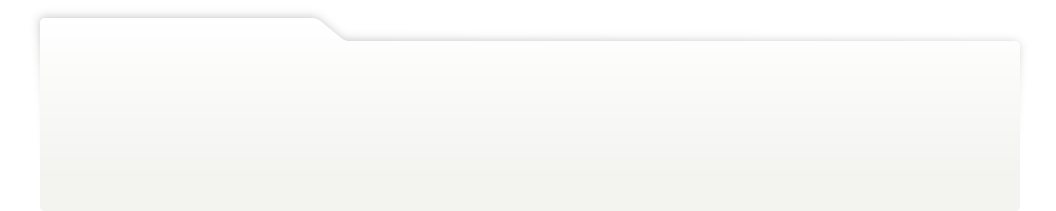
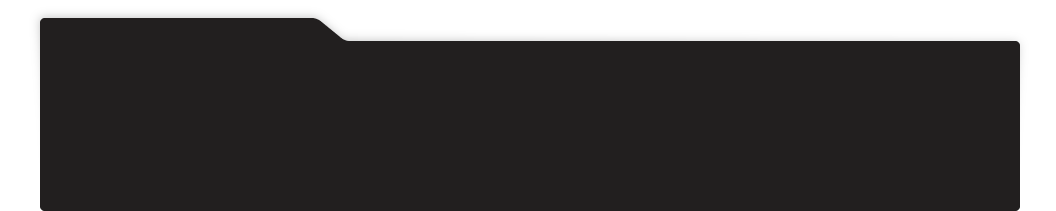
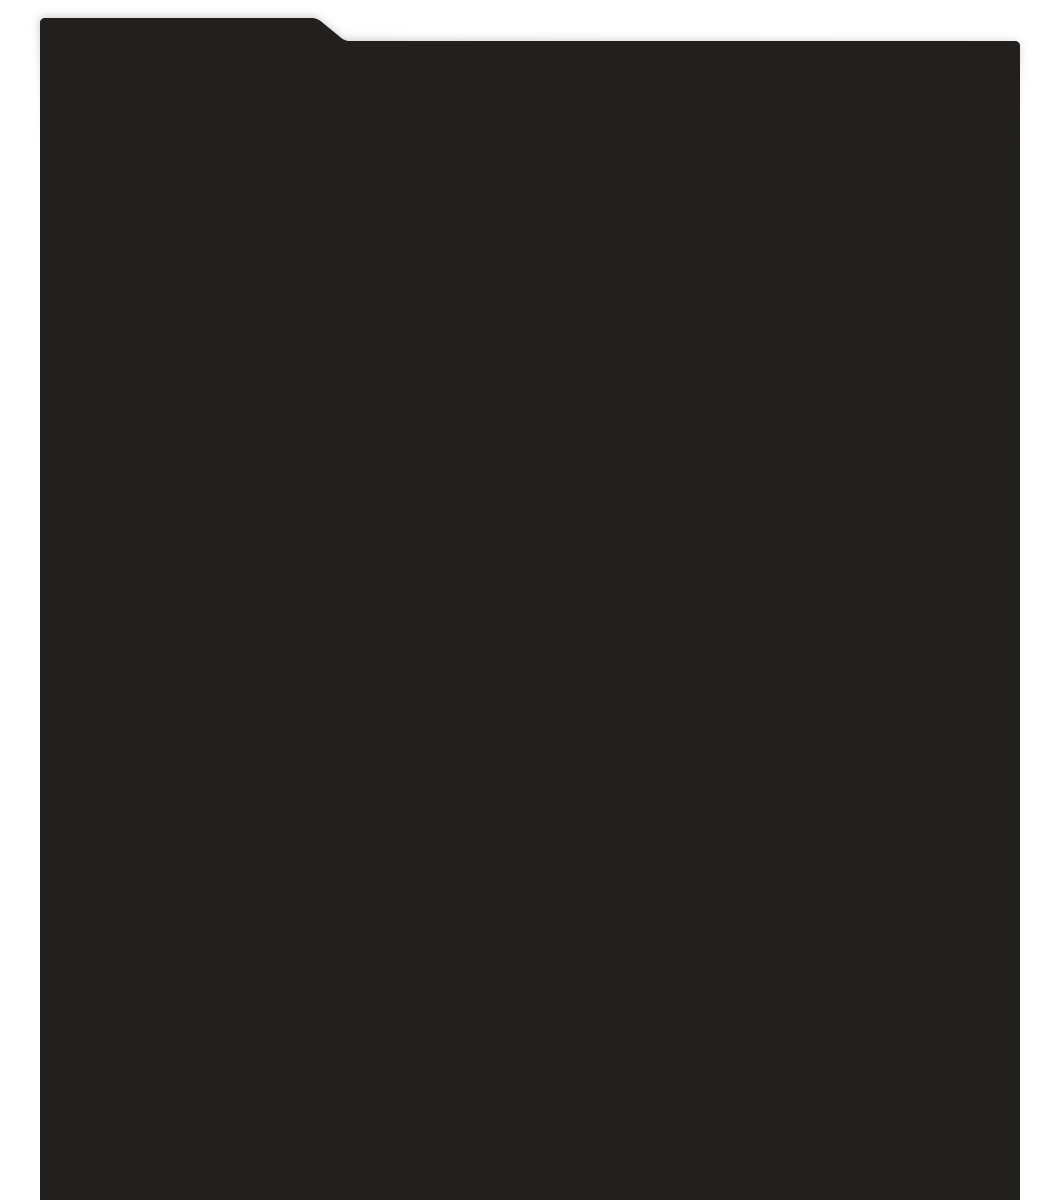
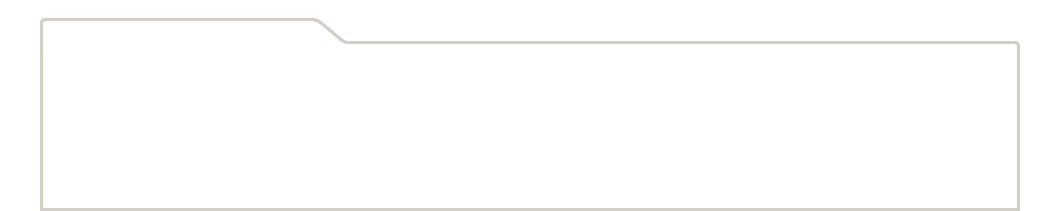
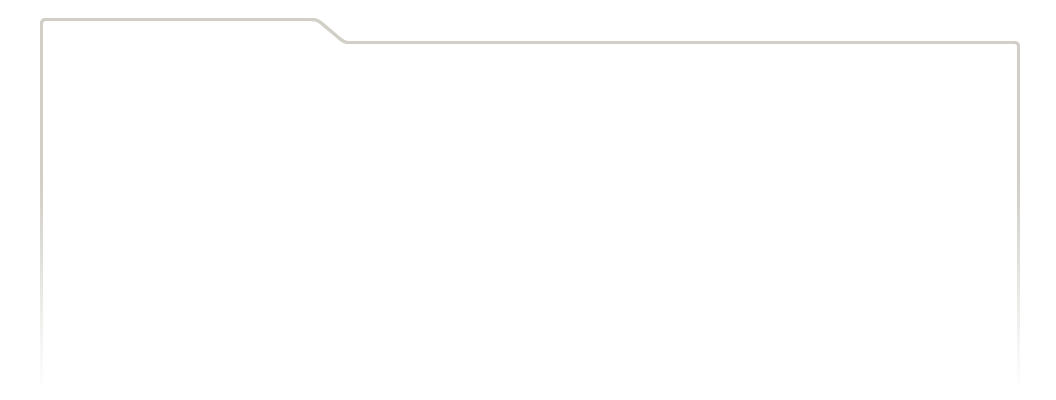
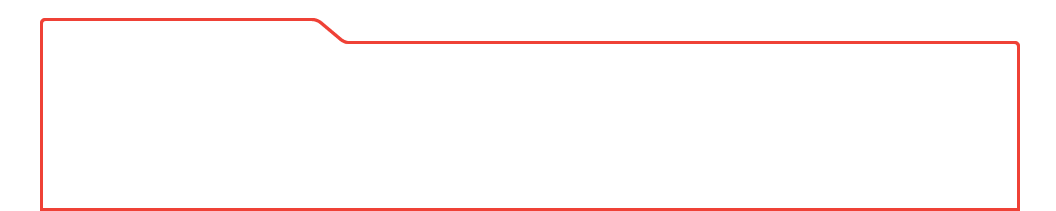
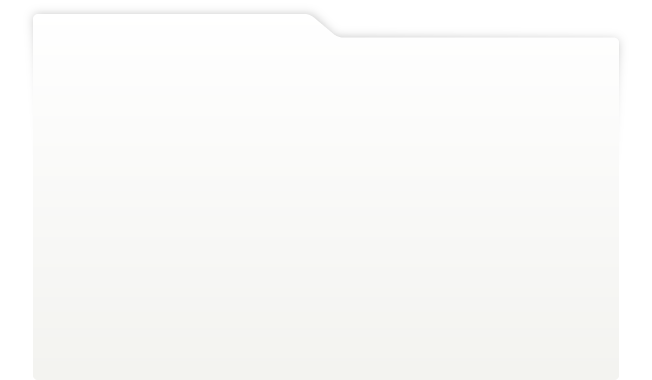
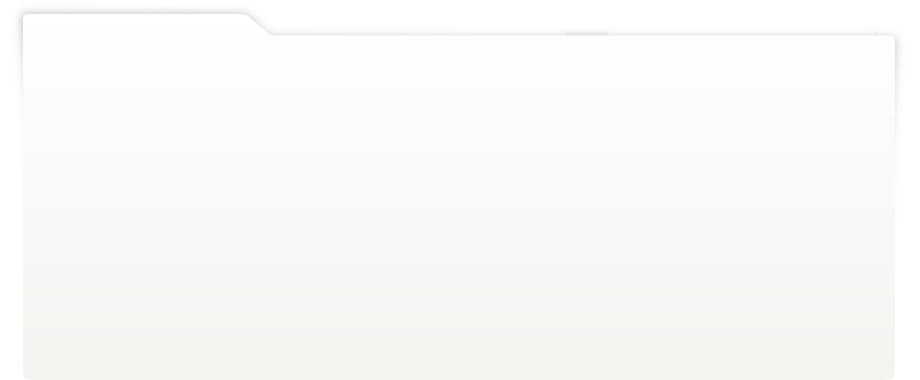
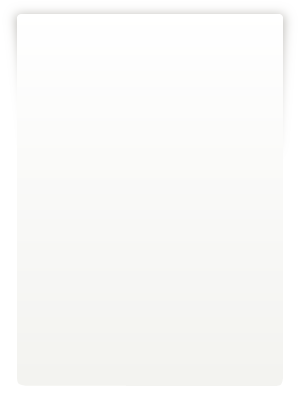
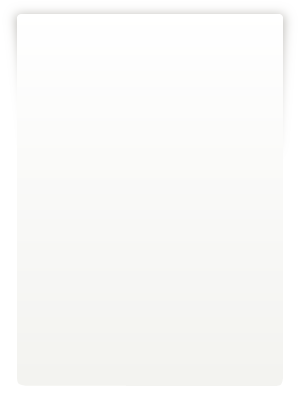
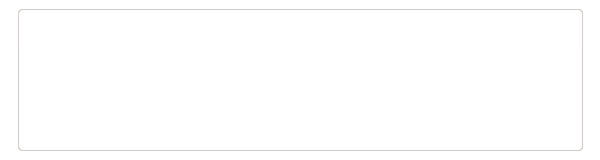
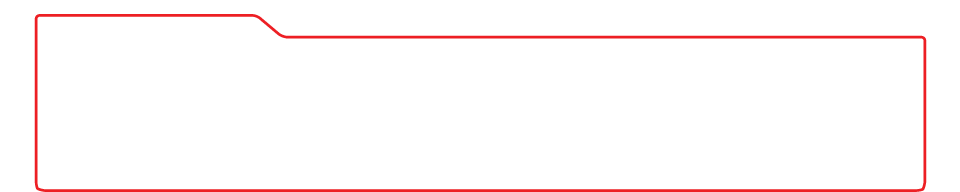
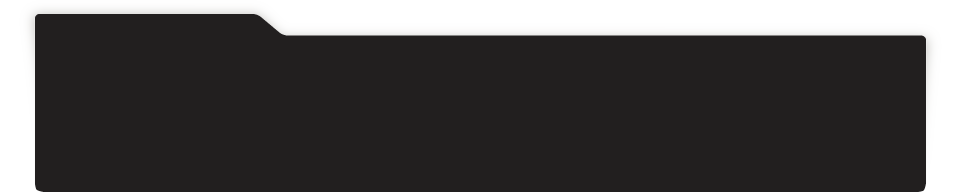
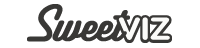
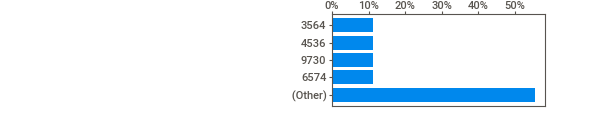
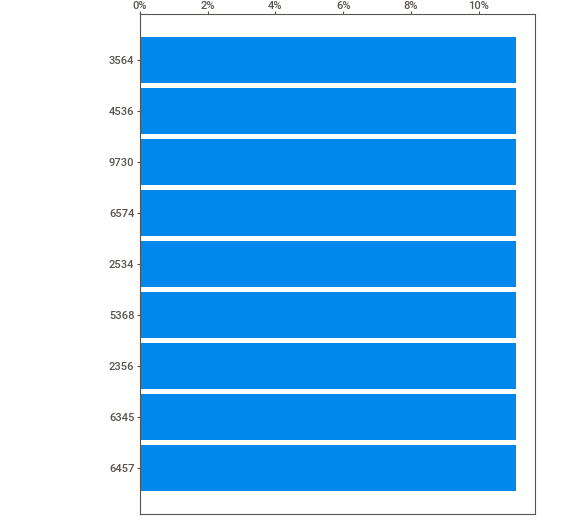
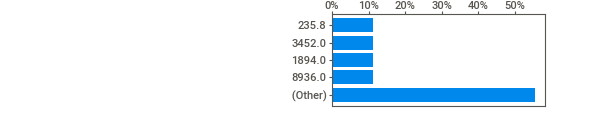
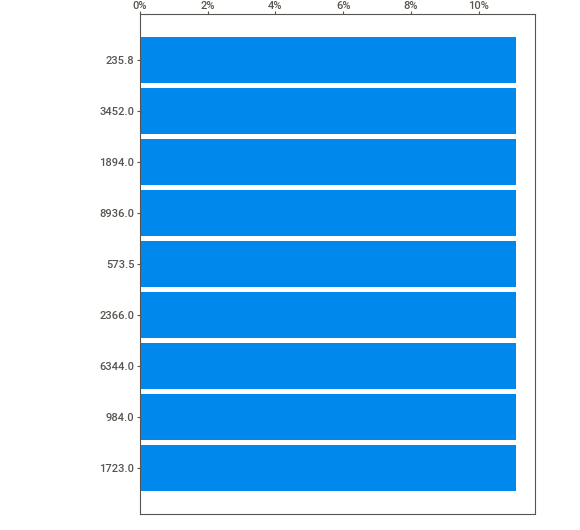
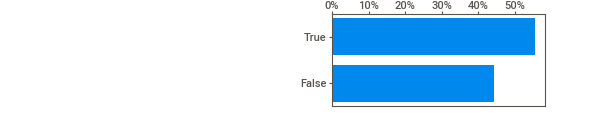
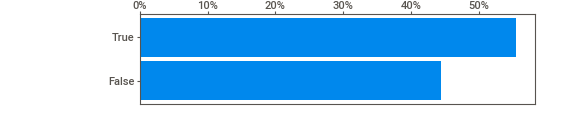
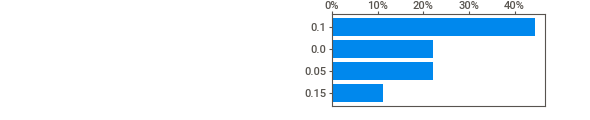
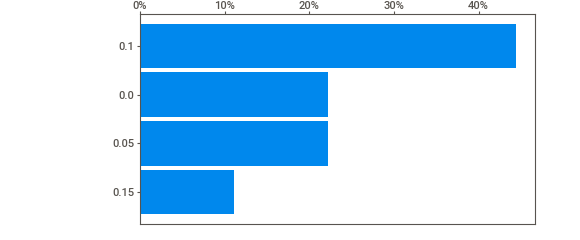
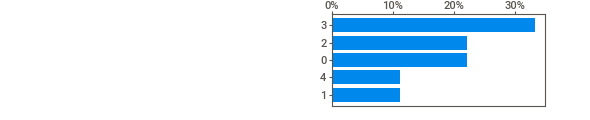
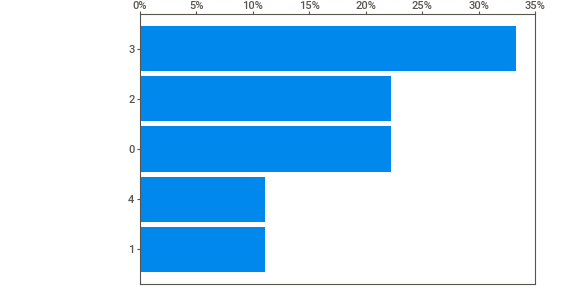
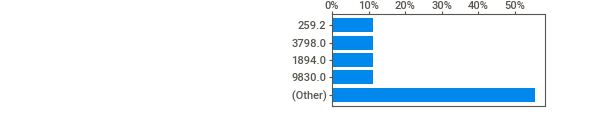
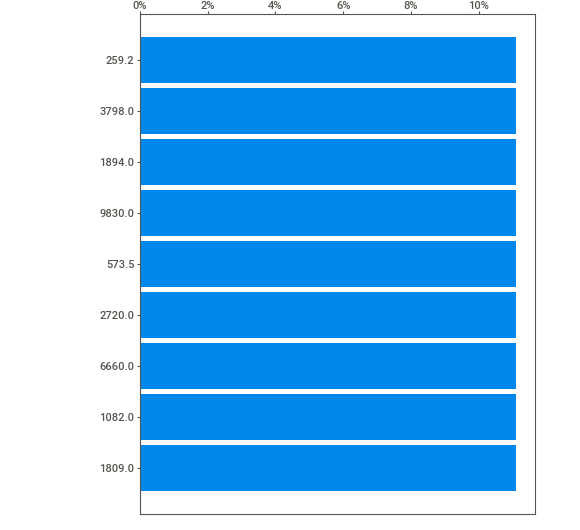
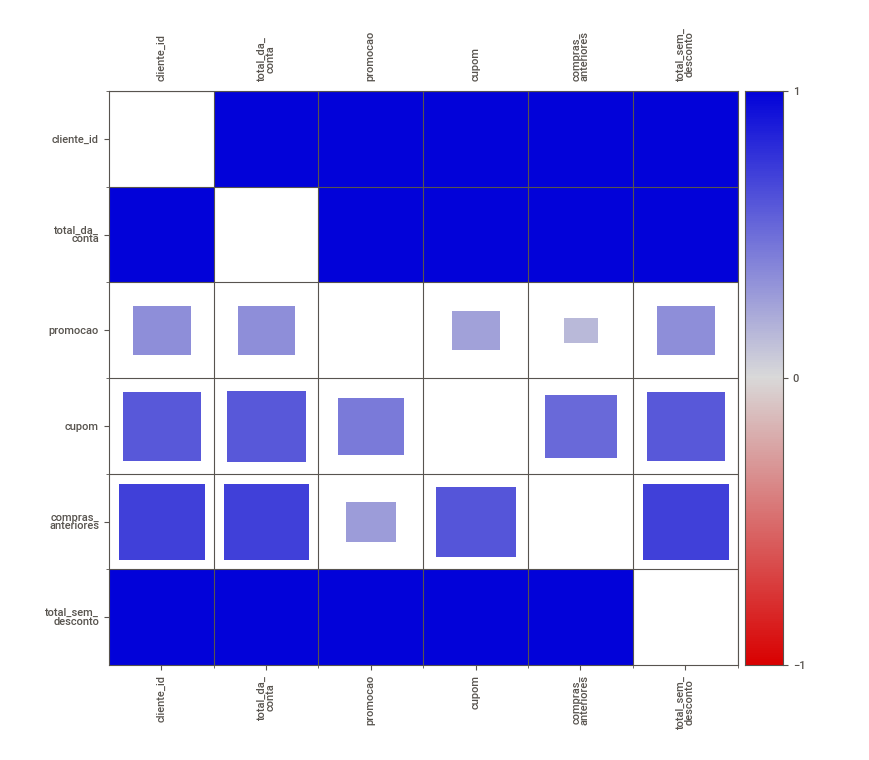
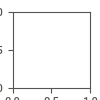

In [30]:
relatorio.show_notebook()

O `sweetviz` tem um recurso interessante que é comparar quadros de dados.

Vamos separar o `df` em dois, selecionando as colunas que queremos comparar:

In [31]:
df_sep = df[["cliente_id", "total_da_conta", "total_sem_desconto", "compras_anteriores"]]
df_sep

,cliente_id,total_da_conta,total_sem_desconto,compras_anteriores
0,3564,235.8,259.2,2
1,4536,3452.0,3798.0,3
2,9730,1894.0,1894.0,0
3,6574,8936.0,9830.0,4
4,2534,573.5,573.5,0
5,5368,2366.0,2720.0,3
6,2356,6344.0,6660.0,2
7,6345,984.0,1082.0,1
8,6457,1723.0,1809.0,3


Vamos selecionar metade para cada grupo:

In [32]:
#total de casos no quadro de dados
df_sep.shape[0]

9

In [33]:
df_a = df_sep[:(df_sep.shape[0] // 2)].select_dtypes("number")
df_a

,cliente_id,total_da_conta,total_sem_desconto,compras_anteriores
0,3564,235.8,259.2,2
1,4536,3452.0,3798.0,3
2,9730,1894.0,1894.0,0
3,6574,8936.0,9830.0,4


In [34]:
df_b = df_sep[(df_sep.shape[0] // 2):].select_dtypes("number")
df_b

,cliente_id,total_da_conta,total_sem_desconto,compras_anteriores
4,2534,573.5,573.5,0
5,5368,2366.0,2720.0,3
6,2356,6344.0,6660.0,2
7,6345,984.0,1082.0,1
8,6457,1723.0,1809.0,3


                                             |                                             | [  0%]   00:00 ->…


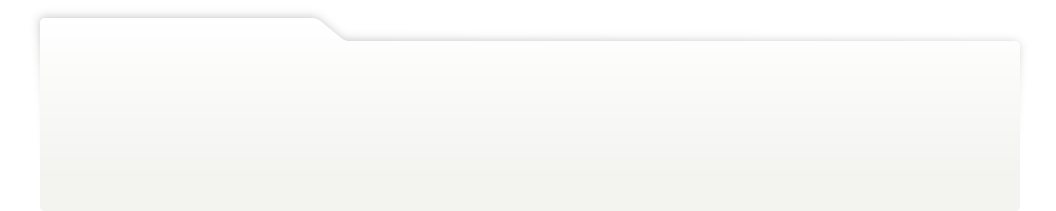
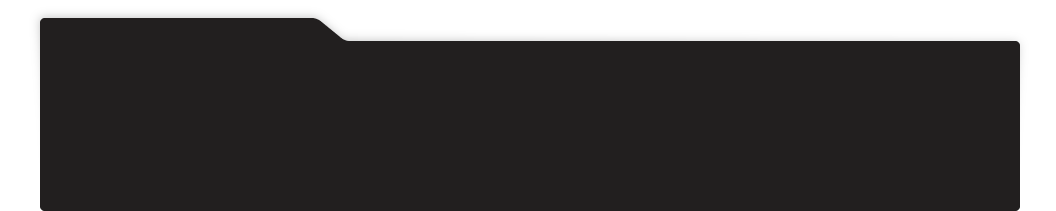
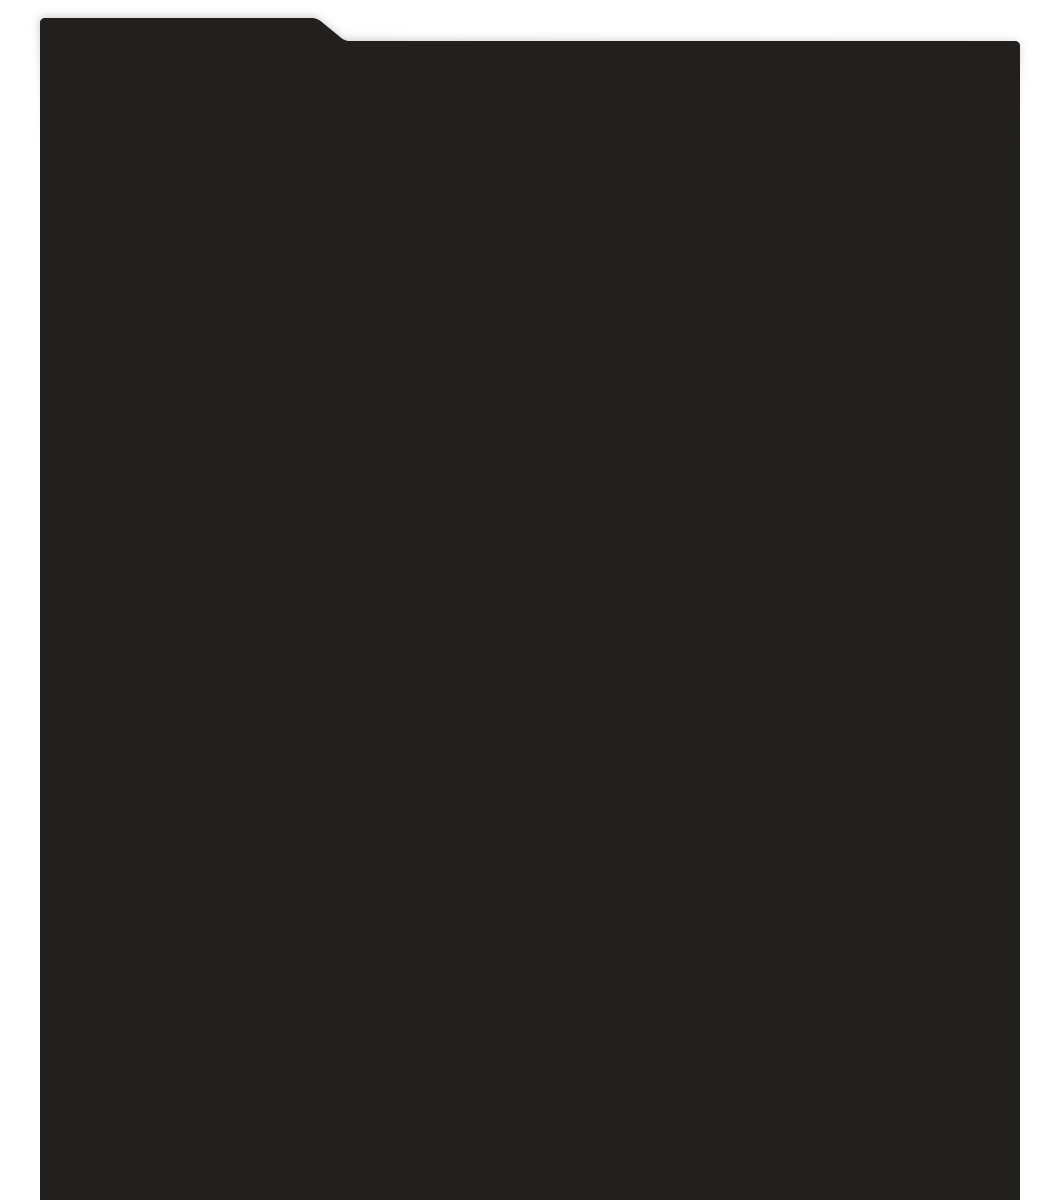
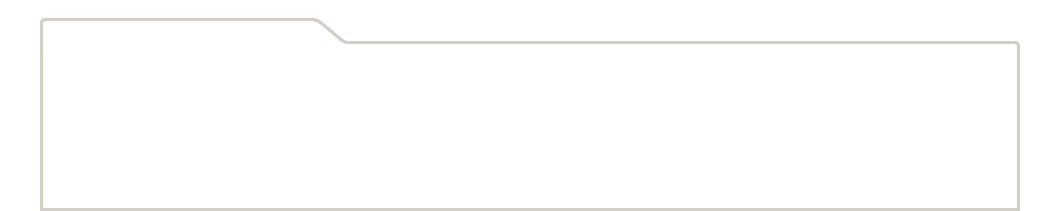
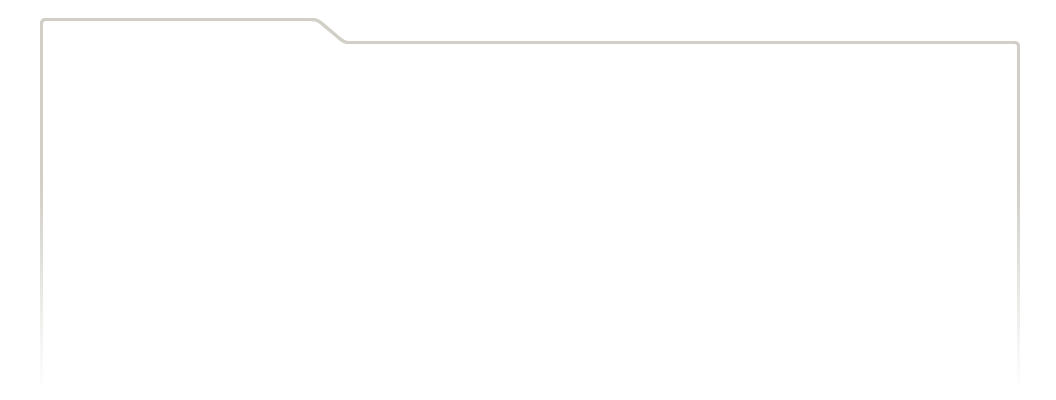
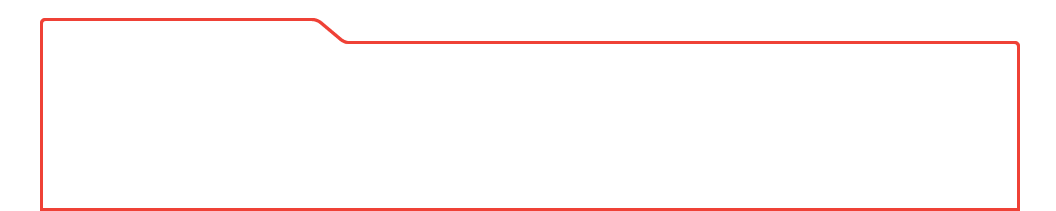
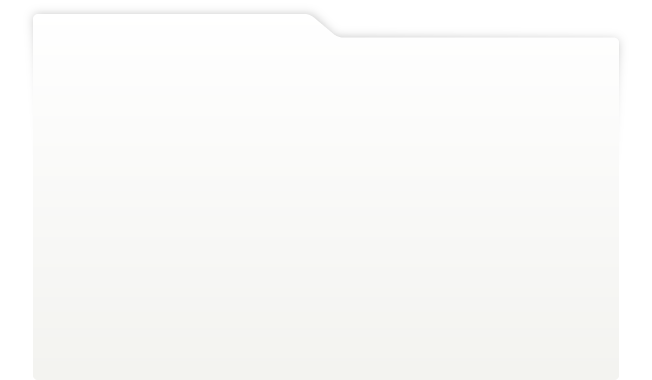
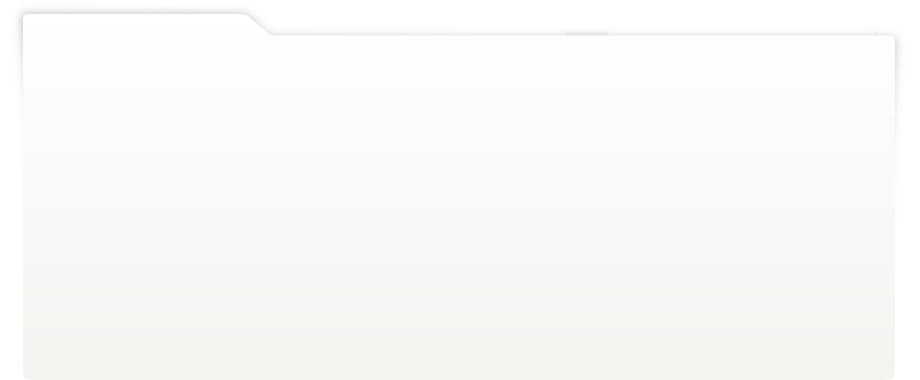
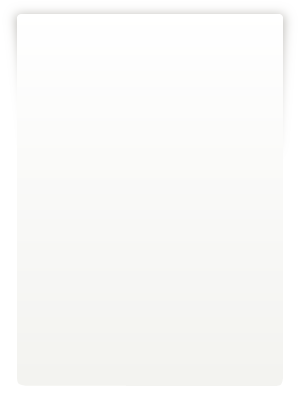
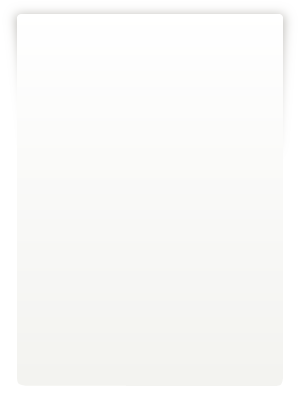
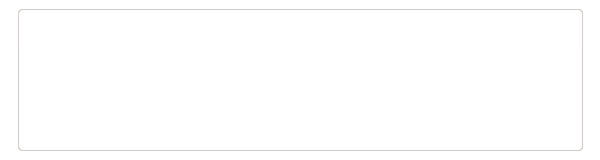
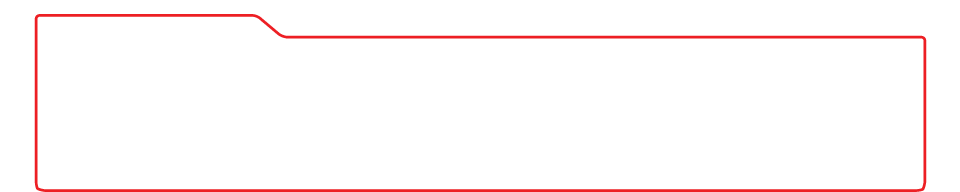
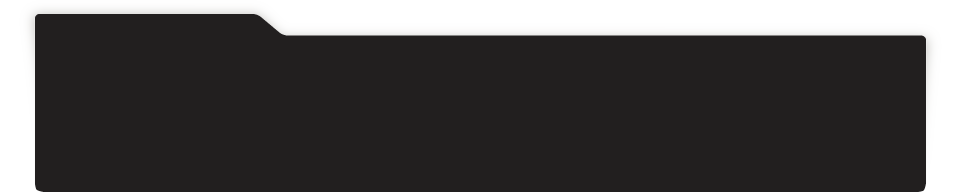
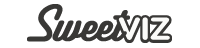
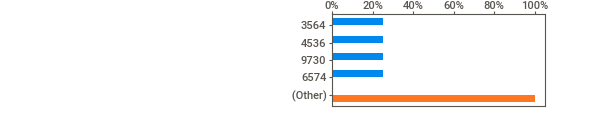
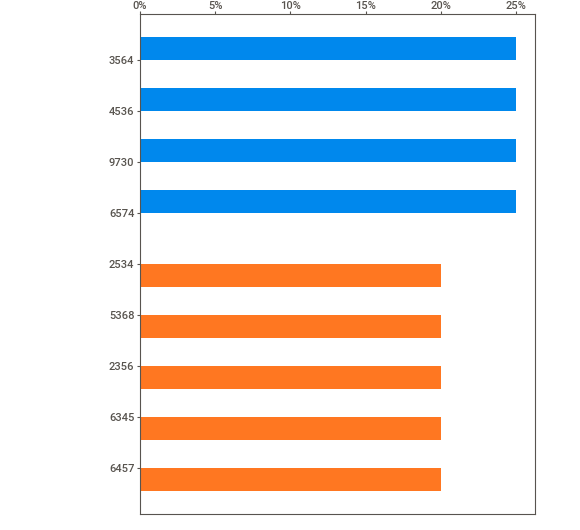
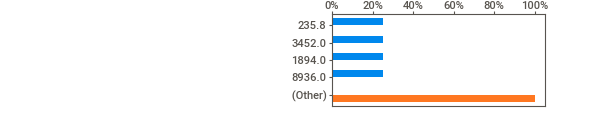
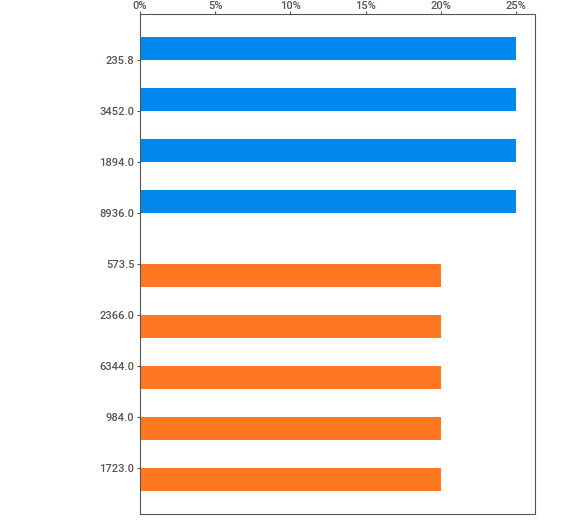
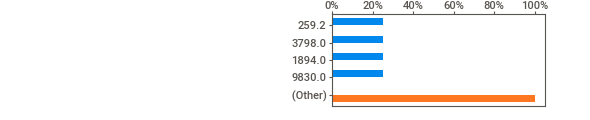
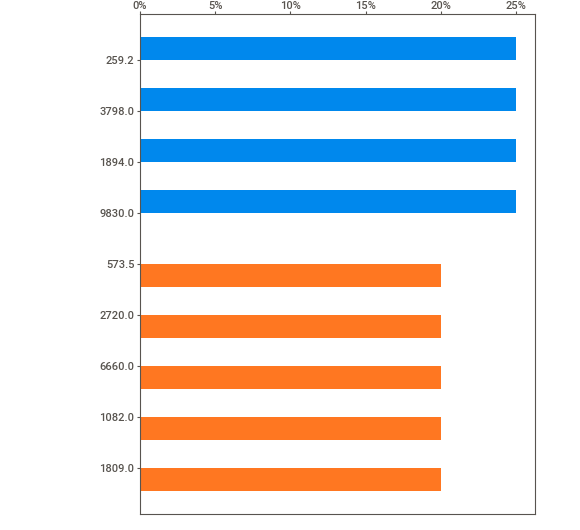
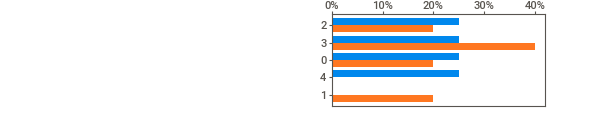
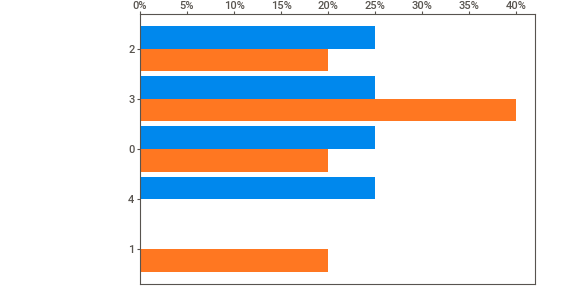
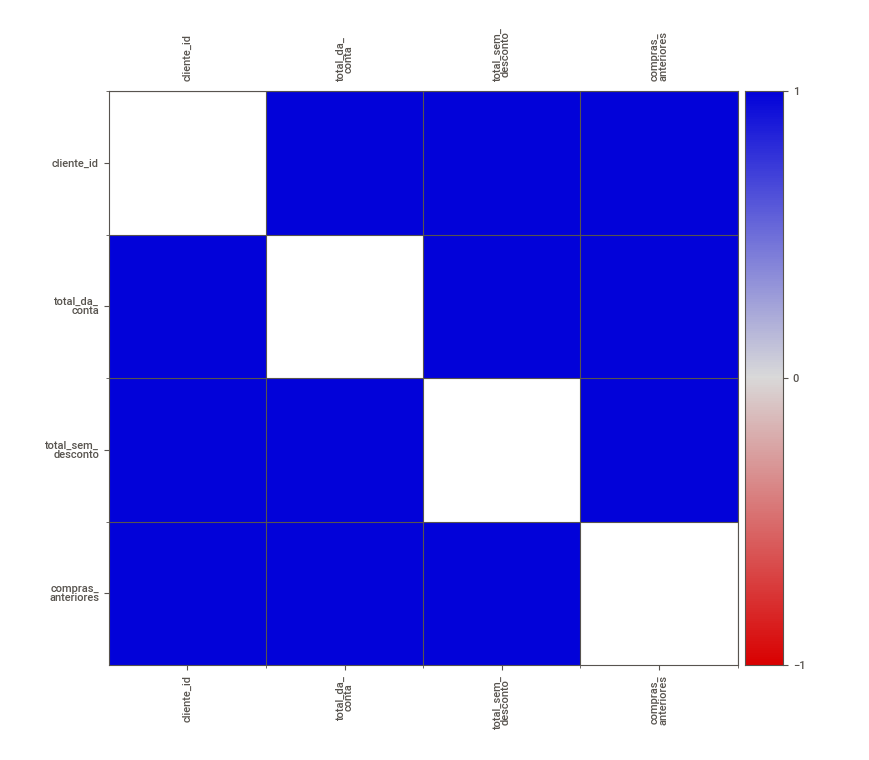
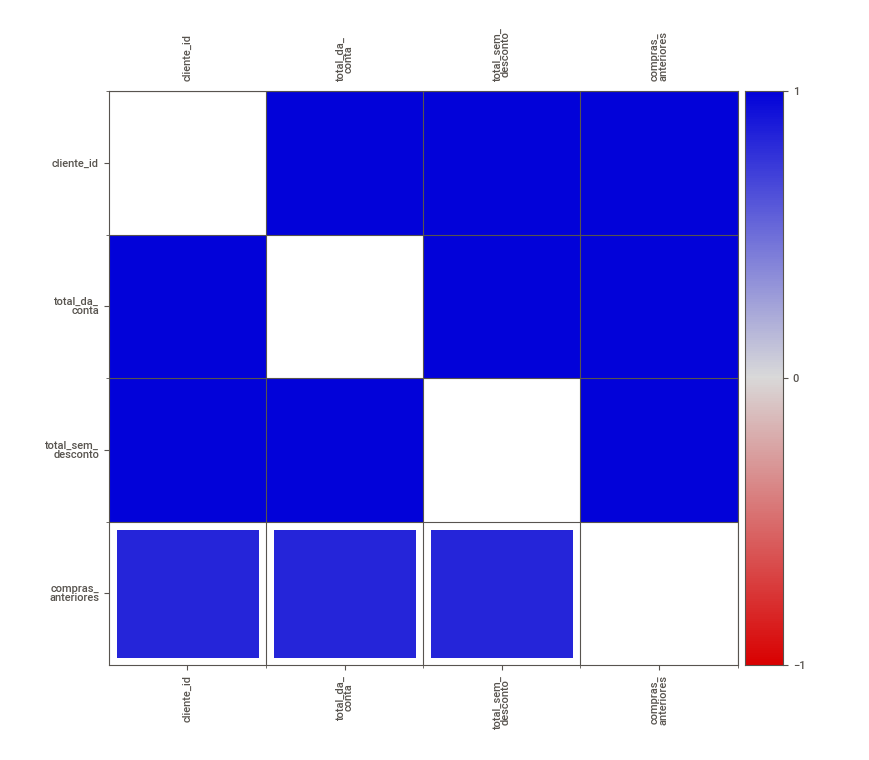

In [35]:
relatorio_comparado = sv.compare([df_a, 'Quadro de dados parte A'],[df_b,'Quadro de dados parte B']) 
relatorio_comparado.show_notebook()

<a name="selecoes">
    <H1>Realizando seleções e filtragens</H1>
</a>

Como vimos em aulas anteriores, o modo mais simples de filtrar é por meio dos colchetes. Lembre-se que passar uma coluna em colchetes simples retorna uma série...

In [36]:
df["total_da_conta"]

0     235.8
1    3452.0
2    1894.0
3    8936.0
4     573.5
5    2366.0
6    6344.0
7     984.0
8    1723.0
Name: total_da_conta, dtype: float64

... enquanto passar em colchetes duplos retorna um quadro de dados, mesmo que só tenha uma coluna:

In [37]:
df[["total_da_conta"]]

,total_da_conta
0,235.8
1,3452.0
2,1894.0
3,8936.0
4,573.5
5,2366.0
6,6344.0
7,984.0
8,1723.0


Com colchetes duplos é possível selecionar mais de uma coluna:

In [38]:
df[["total_da_conta", "total_sem_desconto"]]

,total_da_conta,total_sem_desconto
0,235.8,259.2
1,3452.0,3798.0
2,1894.0,1894.0
3,8936.0,9830.0
4,573.5,573.5
5,2366.0,2720.0
6,6344.0,6660.0
7,984.0,1082.0
8,1723.0,1809.0


Também vimos que é possível filtrar com `.loc[]`. Lembrando, `loc[]` é por rótulo!

In [39]:
df.loc[: ,"cliente_id":"cidade"]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem
4,2534,2020-12-03,573.5,False,0.00,0,Osasco
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte
7,6345,NaN,984.0,True,0.10,1,São Paulo
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro


Mesmo que o rótulo seja número (nós vemos os números mas o `pandas` interpreta como uma etiqueta verbal e não numérica):

In [40]:
df.loc[0:5, :]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro


In [41]:
novo_df = df.set_index("cliente_id")
novo_df

,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
cliente_id,,,,,,,,,
3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [42]:
novo_df.loc[4536:2534, :] #loc trata os índices como str mesmo que sejam números

,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
cliente_id,,,,,,,,,
4536,2020-10-15,3452.0,False,0.1,3,São Paulo,SP,3798.0,caro
9730,2020-11-03,1894.0,True,0.0,0,Rio de Janeiro,RJ,1894.0,medio
6574,2020-11-14,8936.0,True,0.1,4,Contagem,MG,9830.0,caro
2534,2020-12-03,573.5,False,0.0,0,Osasco,SP,573.5,barato


Também vimos que é possível filtrar com `.iloc[]`, mas aqui somente com números:

In [43]:
df.iloc[0:5, :]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.1,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.1,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.0,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.1,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.0,0,Osasco,SP,573.5,barato


In [44]:
df.iloc[:, 2:5]

,total_da_conta,promocao,cupom
0,235.8,True,0.10
1,3452.0,False,0.10
2,1894.0,True,0.00
3,8936.0,True,0.10
4,573.5,False,0.00
5,2366.0,True,0.15
6,6344.0,False,0.05
7,984.0,True,0.10
8,1723.0,False,0.05


In [45]:
df.iloc[2:4, 2:4]

,total_da_conta,promocao
2,1894.0,True
3,8936.0,True


<a name="booleano">
    <H2>Realizando seleções e filtragens com filtro booleano</H2>
</a>

Apesar de muito úteis, `.loc[]` e `.iloc[]` só chegam até um certo ponto. Há horas em que precisamos fazer filtragens mais complexas. Para isso é que existem o que chamamos de filtro booleano ou máscara booleana.

Vamos construir filtros passo-a-passo. Como vimos anteriomente, o formato `df[ seletor ]` serve para passarmos condições de teste entre os colchetes.  Vamos testar:

In [46]:
# criamos uma sequencia de verdadeiro/falso
df.promocao == True 

0     True
1    False
2     True
3     True
4    False
5     True
6    False
7     True
8    False
Name: promocao, dtype: bool

Como o quadro tem `.size` igual ao da série `df.promocao == True`, podemos usar como filtro, e somente os valores verdadeiros sendo extraídos:

In [47]:
list((df.promocao == True).index) == list(df.index)

True

In [48]:
# só retornam as linhas que cumprem com a condição acima, i.e., os que são avaliados como verdadeiro (filtro)
df[df.promocao == True]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio


Agora, seremos capazes de fazer seleções mais complexas, integrando não só uma, como mais de uma condição. 
Para concatenar filtros, usamos os operadores por bit (*bitwise operators*):

* `&`: and 
* `|`: or
* `^`: xor
* `~`: not

> **Dica**: É necessário colocar cada expressão entre parênteses para não ter erros!

Como exemplo, vamos filtrar compras realizadas em SP e cujo total seja maior que R$ 1000,00:

In [49]:
(df.estado == "SP") & (df.total_da_conta > 1000.0)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

Agora, se passarmos essas duas condições no seletor (`[]`), temos somente quem cumpre com `True`:

In [50]:
df[(df.estado == "SP") & (df.total_da_conta > 700.0)]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
1,4536,2020-10-15,3452.0,False,0.1,3,São Paulo,SP,3798.0,caro
7,6345,NaN,984.0,True,0.1,1,São Paulo,SP,1082.0,medio


Temos portanto dois casos de compras realizadas em SP cujo valor seja maior que R$ 1000,00.

Além de selecionar por texto e números, é também é possível criar filtros com o acessador `.str`. Aqui, vamos selecionar compras em cidades que contenham o texto "Paulo" e "Rio":

In [51]:
df[df.cidade.str.contains("Paulo") | df.cidade.str.contains("Rio")]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Para quem quer fazer coisas mais mirabolantes usando `regex`, basta passar o argumento `regex = True` e pau no gato:

In [52]:
df[df.cidade.str.contains("Paulo|Rio", regex=True)]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Você pode começar a ser criativo e fazer seleções cada vez mais complexas! Aqui, pegamos uma coluna de data, mudamos para texto, acessamos pelos métodos de texto para ver se contém `"2020-10"` e depois refiltramos o quadro para retornar somente duas colunas ("cliente_id", "estado"):

In [53]:
df[df.dia_e_horario.astype("str").str.contains("2020-10")][["cliente_id", "estado"]]

,cliente_id,estado
0,3564,SP
1,4536,SP


Aqui, queremos que retorne ou quem não está em MG/RJ ou seja barato:

In [54]:
df[(~df.estado.isin(["MG", "RJ"])) ^ (df.conta_cat.isin(["barato"]))]

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
1,4536,2020-10-15,3452.0,False,0.1,3,São Paulo,SP,3798.0,caro
7,6345,NaN,984.0,True,0.1,1,São Paulo,SP,1082.0,medio


> **Dica**: Conforme os filtros vão ficando complexos, você começa a não entender mais o que você quer; tente ir iterando e refinando seu filtro até chegar onde você deseja.

<a name="query">
    <H2>Realizando seleções e filtragens com <code>df.query()</code></H2>
</a>

A função `df.query()` funciona de forma muito semelhante aos filtros que vimos anteriormente. A grande diferença é que pode ser mais simples, uma vez que recebe como argumento um texto (`str`), em que a expressão se encontra:

In [55]:
df.query("estado == 'SP' & total_da_conta > 700" )

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
1,4536,2020-10-15,3452.0,False,0.1,3,São Paulo,SP,3798.0,caro
7,6345,NaN,984.0,True,0.1,1,São Paulo,SP,1082.0,medio


In [56]:
df.query("compras_anteriores >= 2 & promocao == True")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro


> **Dica**: Ao usar `df.query()` cuidado com textos - se você precisar passar um texto dentro da expressão a ser avaliada, cuide para que as aspas da expressão toda e do texto específico sejam diferentes para não retornar erro.

<a name="where">
    <H2>Realizando seleções e filtragens com <code>df.where()</code> e <code>df.mask()</code></H2>
</a>

O método `df.where()` funciona para selecionar valores num quadro que cumpram com uma condição, *mascarando os demais*. A sintaxe é:

```python
df.where(condicao=False, valor_alternativo)
```

Portanto, `df.where()` verifica se uma condição é falsa, e mascara todas as demais com um valor - aqui, por padrão, `NaN`:

In [57]:
            #se for maior que 2 --> NaN; em todas as células
df.where(df.compras_anteriores > 2)

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4536.0,2020-10-15,3452.0,False,0.10,3.0,São Paulo,SP,3798.0,caro
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6574.0,2020-11-14,8936.0,True,0.10,4.0,Contagem,MG,9830.0,caro
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5368.0,2020-12-20,2366.0,True,0.15,3.0,Volta Redonda,RJ,2720.0,caro
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6457.0,2021-02-01,1723.0,False,0.05,3.0,Rio de Janeiro,RJ,1809.0,medio


Você pode especificar outros valores que `NaN`:

In [58]:
            #se for maior que 2 --> 0; em todas as células
df.where(df.compras_anteriores > 2, 0)

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,0,0,0.0,0,0.00,0,0,0,0.0,0
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,0,0,0.0,0,0.00,0,0,0,0.0,0
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,0,0,0.0,0,0.00,0,0,0,0.0,0
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,0,0,0.0,0,0.00,0,0,0,0.0,0
7,0,0,0.0,0,0.00,0,0,0,0.0,0
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Mais um exemplo: vamos selecionar somente duas colunas (`total_da_conta`, `total_sem_desconto`), mudar ambas para `float`, e onde `total_sem_desconto < 2000` retornar `False`, colocamos `">= 2000`. 

In [59]:
df_where = (df
            [["total_da_conta", "total_sem_desconto"]]
            .astype({"total_da_conta":"float", 
                     "total_sem_desconto": "float"})
            .where(df.total_sem_desconto < 2000, ">= 2000")
           )

df_where

,total_da_conta,total_sem_desconto
0,235.8,259.2
1,>= 2000,>= 2000
2,1894.0,1894.0
3,>= 2000,>= 2000
4,573.5,573.5
5,>= 2000,>= 2000
6,>= 2000,>= 2000
7,984.0,1082.0
8,1723.0,1809.0


A operação contária é feita com `df.mask()`. Isto é, onde a condição for verdadeira, substitui por `NaN` ou por outro valor que você definir.

```python
df.where(condicao=True, valor_alternativo)
```


Neste exemplo, vamos selecionar duas colunas (`cidade`, `estado`), e usar `.mask` para substituir `df.estado != "MG"` por `"Fora de MG"`. Além disso, eliminamos os duplicados, passando `.drop_duplicates()`. Se você quiser deixar pelo menos uma linha contendo `"Fora de MG"`, não passe nenhum argumento ou passe `keep = "first"` (para deixar a primeira instância) ou `keep = "last"` (para deixar a última instância).

In [60]:
#df_mask = 
(df
 [["cidade", "estado"]]
 .mask(df.estado != "MG", "Fora de MG")
 .drop_duplicates(keep=False)
)

,cidade,estado
3,Contagem,MG
6,Belo Horizonte,MG


<a name="sort_values">
    <H1>Ordenando dados com <code>.sort_values()</code></H1>
</a>

Quando vimos séries na aula passada, vimos como ordenar uma série usando o método `.sort_values()`. Esse método também funciona com quadros de dados. Vamos selecionar uma coluna e ordenar por ela:

In [61]:
df.sort_values("cliente_id")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio


Esse mecanismo de ordenação também funciona com variáveis do tipo texto (usando a ordem da tabela ASCII):

In [62]:
df.sort_values("cidade")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro


Você também pode passar mais de uma coluna para ordenar - sempre que possível a ordem será feita pela primeira, depois pela segunda, etc.

In [63]:
df.sort_values(by=["promocao", "total_sem_desconto"])

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro


In [64]:
(df
 [["estado", "cidade"]]
 .sort_values(["estado", "cidade"])
)

,estado,cidade
6,MG,Belo Horizonte
3,MG,Contagem
2,RJ,Rio de Janeiro
8,RJ,Rio de Janeiro
5,RJ,Volta Redonda
4,SP,Osasco
0,SP,São Paulo
1,SP,São Paulo
7,SP,São Paulo


Para reverter a ordem (de crescente para decrescente), use `ascending = False`:

In [65]:
(df
 [["estado", "cidade"]]
 .sort_values(["estado", "cidade"], 
              ascending=False)
)

,estado,cidade
0,SP,São Paulo
1,SP,São Paulo
7,SP,São Paulo
4,SP,Osasco
5,RJ,Volta Redonda
2,RJ,Rio de Janeiro
8,RJ,Rio de Janeiro
3,MG,Contagem
6,MG,Belo Horizonte


In [66]:
(df
 [["dia_e_horario", "cliente_id", "total_sem_desconto"]]
 .sort_values("dia_e_horario", 
              ascending=False)
)

,dia_e_horario,cliente_id,total_sem_desconto
8,2021-02-01,6457,1809.0
6,2021-01-04,2356,6660.0
5,2020-12-20,5368,2720.0
4,2020-12-03,2534,573.5
3,2020-11-14,6574,9830.0
2,2020-11-03,9730,1894.0
1,2020-10-15,4536,3798.0
0,2020-10-01,3564,259.2
7,NaN,6345,1082.0


<a name="faltantes">
    <H1>Lidando com dados faltantes</H1>
</a>

Para começar, vamos pegar o nosso `df` surrado de guerra e inserir uns valores faltantes, além dos reconhecidos por padrão no `pandas` (`NA`, `NaN`, `None`):

In [67]:
df.loc[2, "total_da_conta"] = "-"
df.loc[2, "promocao"] = "-"
df.loc[5, "cidade"] = "?"
df.loc[3, "conta_cat"] = "sem informação"
df.loc[7, "conta_cat"] = "sem informação"
df.loc[7, "cupom"] = np.nan

Podemos ver o efeito disso no quadro de dados:

In [68]:
df

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,-,-,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,sem informação
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,?,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,NaN,1,São Paulo,SP,1082.0,sem informação
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Por causa disso, houve alteração em alguns tipos de séries (vide aula passada):

In [69]:
df.dtypes

cliente_id              int64
dia_e_horario          object
total_da_conta         object
promocao               object
cupom                 float64
compras_anteriores      int64
cidade                 object
estado                 object
total_sem_desconto    float64
conta_cat              object
dtype: object

Vamos salvar esse `df` alterado para podermos fazer operações nele:

In [70]:
df.to_csv("data/df_nan.csv", sep=";", index=False)

<a name="padronizando">
    <H2>Padronizando dados faltantes</H2>
</a>

A primeira estratégia para limpar isso é, após fazer uma análise cuidadosa do seu quadro de dados, ou limpar coluna a coluna (como fizemos na última aula), ou estabelecer uma lista de valores faltantes:

In [71]:
valores_faltantes = [np.nan, "-", "?", "sem informação"]

Agora sim, podemos importar o `.csv` com esses valores substituídos por `NaN`:

In [72]:
                                                                               #não salva o índice como coluna
df_nan = pd.read_csv("data/df_nan.csv", sep=";", na_values= valores_faltantes, index_col=False)

In [73]:
df_nan

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,NaN,NaN,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,NaN
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,NaN,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,NaN,1,São Paulo,SP,1082.0,NaN
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Mas na maioria dos casos, se você for que nem eu, você não vai pensar nisso - você vai acabar pensando só depois que tinha uns valores estranhos ali que na verdade deveriam ser `NaN`. Nesse caso, você também pode limpar coluna a coluna, ou usar o método `.replace()` no quadro inteiro. No final o resultado será o mesmo:

In [74]:
df_nan = pd.read_csv("data/df_nan.csv", sep=";")
df_nan

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,-,-,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,sem informação
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,?,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,NaN,1,São Paulo,SP,1082.0,sem informação
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [75]:
df_nan.replace({"-": np.nan, 
                "?": np.nan, 
                "sem informação": np.nan}, 
               inplace=True)

In [76]:
df_nan

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,NaN,NaN,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,NaN
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,NaN,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,NaN,1,São Paulo,SP,1082.0,NaN
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


<a name="limpando">
    <H2>Limpando dados faltantes</H2>
</a>


In [77]:
df_nan.dropna(axis="rows")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [78]:
df_nan.dropna()

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [79]:
df_nan.dropna(axis="columns")

,cliente_id,compras_anteriores,estado,total_sem_desconto
0,3564,2,SP,259.2
1,4536,3,SP,3798.0
2,9730,0,RJ,1894.0
3,6574,4,MG,9830.0
4,2534,0,SP,573.5
5,5368,3,RJ,2720.0
6,2356,2,MG,6660.0
7,6345,1,SP,1082.0
8,6457,3,RJ,1809.0


> **Dica**: o método `.dropna()` não salva, você precisa explicitar com `inplace=True`

<a name="preenchendo">
    <H2>Preenchendo dados faltantes</H2>
</a>


In [80]:
df_nan

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,NaN,NaN,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,NaN
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,NaN,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,NaN,1,São Paulo,SP,1082.0,NaN
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Valor fixo:

In [81]:
df_nan.fillna(0)

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,0,0,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,0
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,0,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,0,984.0,True,0.00,1,São Paulo,SP,1082.0,0
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Substituir por alguma computação:

In [82]:
media = (df_nan
         .total_da_conta
         .astype("float")
         .mean())

In [83]:
df_nan.total_da_conta = (df_nan
                         .total_da_conta
                         .astype("float")
                         .fillna(media)
                        )

In [84]:
df_nan

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8000,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0000,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,3076.7875,NaN,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0000,True,0.10,4,Contagem,MG,9830.0,NaN
4,2534,2020-12-03,573.5000,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0000,True,0.15,3,NaN,RJ,2720.0,caro
6,2356,2021-01-04,6344.0000,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0000,True,NaN,1,São Paulo,SP,1082.0,NaN
8,6457,2021-02-01,1723.0000,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [85]:
df_nan.fillna(axis="rows", method="bfill")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8000,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0000,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,3076.7875,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0000,True,0.10,4,Contagem,MG,9830.0,barato
4,2534,2020-12-03,573.5000,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0000,True,0.15,3,Belo Horizonte,RJ,2720.0,caro
6,2356,2021-01-04,6344.0000,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,2021-02-01,984.0000,True,0.05,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0000,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [86]:
df_nan.fillna(axis="rows", method="ffill")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8000,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0000,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,3076.7875,False,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0000,True,0.10,4,Contagem,MG,9830.0,medio
4,2534,2020-12-03,573.5000,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0000,True,0.15,3,Osasco,RJ,2720.0,caro
6,2356,2021-01-04,6344.0000,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,2021-01-04,984.0000,True,0.05,1,São Paulo,SP,1082.0,caro
8,6457,2021-02-01,1723.0000,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


<a name="juntando">
    <H1>Juntando quadros de dados</H1>
</a>

No `pandas` há três formas principais de juntar quadros de dados:

* `df.append()`: juntar quadros por linhas (um quadro em cima de outro)
* `pd.concat()`: juntar quadros por linhas ou colunas (um quadro do lado do outro)
* `pd.merge()`: juntar quadros por índices ou colunas em comum


<a name="concat">
    <H2>Juntando quadros de dados com <code>pd.concat()</code> e <code>df.append()</code></H2>
</a>




A função `pd.concat()` e o método `df.append()` funcionam de forma muito similar (tanto que `.append()` é uma versão simplificada, um caso específico de `pd.concat()`. Vamos começar com `pd.concat()` que tem mais opções e depois ver como `df.append()` é similar.

Para começar, vamos importar os dados da aula passada:

In [87]:
df = pd.read_csv("data/contas_limpo.csv", 
                 encoding="UTF-8")
df

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


Agora, aqui temos outro `.csv` contendo os mesmos campos:

In [88]:
df2 = pd.read_csv("data/contas_limpo_.csv", 
                 encoding="UTF-8")
df2

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,7364,2020-10-01,1435.8,True,0.1,2,São Paulo,SP,259.2,barato
1,6336,2020-10-15,6452.0,False,0.1,3,São Paulo,SP,3798.0,caro
2,9230,2020-11-03,794.0,True,0.0,0,Rio de Janeiro,RJ,1894.0,medio
3,9474,2020-11-14,936.0,True,0.1,4,Belo Horizonte,MG,9830.0,caro


Como importamos novos dados, pode parecer que são visualmente os mesmo tipos de dados, mas não custa testar:

In [89]:
list(df.dtypes) == list(df2.dtypes)

True

Isso acontece porque algumas colunas perderam seu tipo de dado quando transformamos o `df` para `.csv` e o `df2` não teve nenhum tipo de coluna alterado durante a importação (precisa redefinir tipos).

Vamos juntá-los com `pd.concat()`

In [90]:
df_junto = pd.concat([df, df2])
df_junto

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio
0,7364,2020-10-01,1435.8,True,0.10,2,São Paulo,SP,259.2,barato


Cuidado! Perceba que os índices não são únicos! Isto acontece porque os índices estão empilhados da mesma forma como nos quadros de dados originais:

In [91]:
df_junto.index.nunique() < df_junto.index.size

True

Para resolver esse problema, oasse o argumento `ignore_index=True` e o `pandas` recria os índices de 0 a `len(df)`:

In [92]:
df_junto = pd.concat([df, df2], ignore_index=True)
df_junto

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio
9,7364,2020-10-01,1435.8,True,0.10,2,São Paulo,SP,259.2,barato


In [93]:
df_junto.index.nunique() == df_junto.index.size

True

Uma forma mais simples de juntar os quadros (um em cima do outro) é com o método `.append()`. Lembre-se somente que como subcaso de `pd.concat()`, `.append()` só serve para esse caso específico (juntar horizontalmente dois quadros).

In [94]:
df3 = df.append(df2, ignore_index=True)
df3

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio
9,7364,2020-10-01,1435.8,True,0.10,2,São Paulo,SP,259.2,barato


Quando temos junção horizontal (um quadro em cima do outro) é relativamente tranquilo, se cada linha for uma instância, por exemplo. Mas podemos usar `pd.concat()` para juntar quadros lateralmente. Nesse caso, o `pd.concat()` busca pelos índices - e o que não tiver em comum, substitui por `NaN`. Por isso é importante manter os índices iguais desejados.

Vamos colocar `cliente_id` como índice de `df_junto`:

In [95]:
df_junto.set_index("cliente_id", inplace=True)

In [96]:
df_junto.sort_index()

,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
cliente_id,,,,,,,,,
2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6336,2020-10-15,6452.0,False,0.10,3,São Paulo,SP,3798.0,caro
6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio
6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro


Vamos importar outro `.csv` que tem alguns dados de clientes com uma coluna `devolucao`. Já importamos direto com `cliente_id` como índice:

In [97]:
df_lateral = pd.read_csv("data/contas_lateral.csv", 
                         sep="\t", #separado por tab
                         index_col="cliente_id")

In [98]:
df_lateral.sort_index()

,devolucao
cliente_id,
2356,False
3564,False
4536,False
5368,False
6336,False
6345,False
6457,False
6574,False
9230,True


Agora, fica fácil para o `pd.concat()` utilizar a coluna `cliente_id` para juntar os quadros. Perceba que dados faltantes em ambos são convertidos para `NaN`:

In [99]:
df_junto_lateral = pd.concat([df_junto, df_lateral], axis="columns")
df_junto_lateral

,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat,devolucao
cliente_id,,,,,,,,,,
2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro,False
2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato,NaN
3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato,False
4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro,False
5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro,False
6336,2020-10-15,6452.0,False,0.10,3,São Paulo,SP,3798.0,caro,False
6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio,False
6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio,False
6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro,False


In [100]:
df_junto_lateral.devolucao.count() == df_junto.size

False

<a name="merge">
    <H2>Juntando quadros de dados com <code>pd.merge</code></H2>
</a>

In [101]:
df_junto_lateral.reset_index(inplace=True)

In [102]:
df_junto_lateral

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat,devolucao
0,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro,False
1,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato,NaN
2,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato,False
3,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro,False
4,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro,False
5,6336,2020-10-15,6452.0,False,0.10,3,São Paulo,SP,3798.0,caro,False
6,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio,False
7,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio,False
8,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro,False
9,7364,2020-10-01,1435.8,True,0.10,2,São Paulo,SP,259.2,barato,NaN


In [103]:
nomes = pd.read_csv("data/nomes.csv", sep=";")

In [104]:
nomes

,cliente_id,nome
0,6457,Gandalf Maia
1,5368,Gohan Gokusson
2,6345,Seiya de Pégaso
3,4536,Kenshin Himura
4,6574,Chun-Li
5,9230,Patrine
6,5843,Yusuke Urameshi
7,9710,Bulma


In [105]:
df_nomes = pd.merge(nomes, df_junto_lateral)

In [106]:
df_nomes

,cliente_id,nome,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat,devolucao
0,6457,Gandalf Maia,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio,False
1,5368,Gohan Gokusson,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro,False
2,6345,Seiya de Pégaso,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio,False
3,4536,Kenshin Himura,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro,False
4,6574,Chun-Li,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro,False
5,9230,Patrine,2020-11-03,794.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio,True


In [107]:
df_nomes = pd.merge(nomes, df_junto_lateral, how="outer")

In [108]:
df_nomes

,cliente_id,nome,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat,devolucao
0,6457,Gandalf Maia,2021-02-01,1723.0,False,0.05,3.0,Rio de Janeiro,RJ,1809.0,medio,False
1,5368,Gohan Gokusson,2020-12-20,2366.0,True,0.15,3.0,Volta Redonda,RJ,2720.0,caro,False
2,6345,Seiya de Pégaso,NaN,984.0,True,0.10,1.0,São Paulo,SP,1082.0,medio,False
3,4536,Kenshin Himura,2020-10-15,3452.0,False,0.10,3.0,São Paulo,SP,3798.0,caro,False
4,6574,Chun-Li,2020-11-14,8936.0,True,0.10,4.0,Contagem,MG,9830.0,caro,False
5,9230,Patrine,2020-11-03,794.0,True,0.00,0.0,Rio de Janeiro,RJ,1894.0,medio,True
6,5843,Yusuke Urameshi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9710,Bulma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2356,NaN,2021-01-04,6344.0,False,0.05,2.0,Belo Horizonte,MG,6660.0,caro,False
9,2534,NaN,2020-12-03,573.5,False,0.00,0.0,Osasco,SP,573.5,barato,NaN


In [109]:
df_nomes = pd.merge(nomes, df_junto_lateral, how="left")

In [110]:
df_nomes

,cliente_id,nome,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat,devolucao
0,6457,Gandalf Maia,2021-02-01,1723.0,False,0.05,3.0,Rio de Janeiro,RJ,1809.0,medio,False
1,5368,Gohan Gokusson,2020-12-20,2366.0,True,0.15,3.0,Volta Redonda,RJ,2720.0,caro,False
2,6345,Seiya de Pégaso,NaN,984.0,True,0.10,1.0,São Paulo,SP,1082.0,medio,False
3,4536,Kenshin Himura,2020-10-15,3452.0,False,0.10,3.0,São Paulo,SP,3798.0,caro,False
4,6574,Chun-Li,2020-11-14,8936.0,True,0.10,4.0,Contagem,MG,9830.0,caro,False
5,9230,Patrine,2020-11-03,794.0,True,0.00,0.0,Rio de Janeiro,RJ,1894.0,medio,True
6,5843,Yusuke Urameshi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9710,Bulma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df_nomes = pd.merge(nomes, df_junto_lateral, how="right")

In [112]:
df_nomes

,cliente_id,nome,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat,devolucao
0,2356,NaN,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro,False
1,2534,NaN,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato,NaN
2,3564,NaN,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato,False
3,4536,Kenshin Himura,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro,False
4,5368,Gohan Gokusson,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro,False
5,6336,NaN,2020-10-15,6452.0,False,0.10,3,São Paulo,SP,3798.0,caro,False
6,6345,Seiya de Pégaso,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio,False
7,6457,Gandalf Maia,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio,False
8,6574,Chun-Li,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro,False
9,7364,NaN,2020-10-01,1435.8,True,0.10,2,São Paulo,SP,259.2,barato,NaN


<a name="faltantes">
    <H1>Verificar dados faltantes</H1>
</a>

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

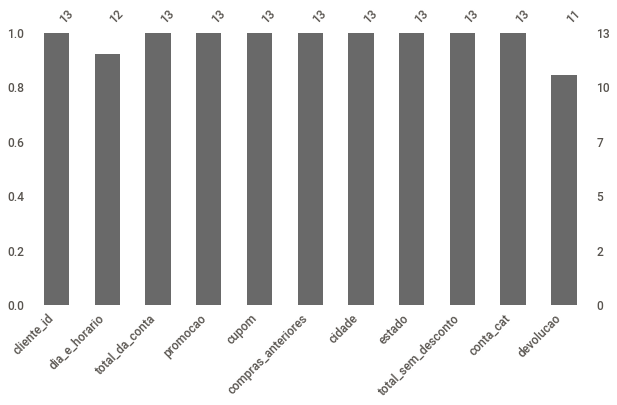

In [114]:
msno.bar(df_junto_lateral, figsize=(10,5), fontsize=12); 

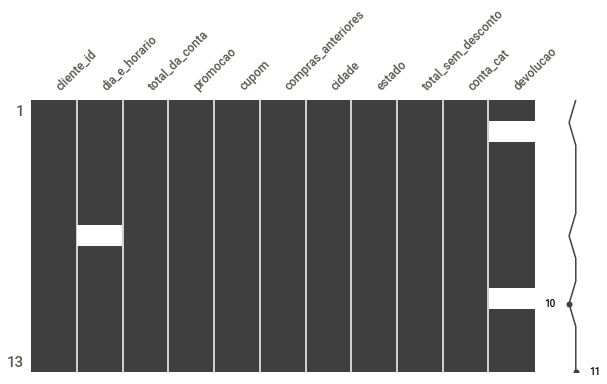

In [115]:
msno.matrix(df_junto_lateral, figsize=(10,5), fontsize=12);

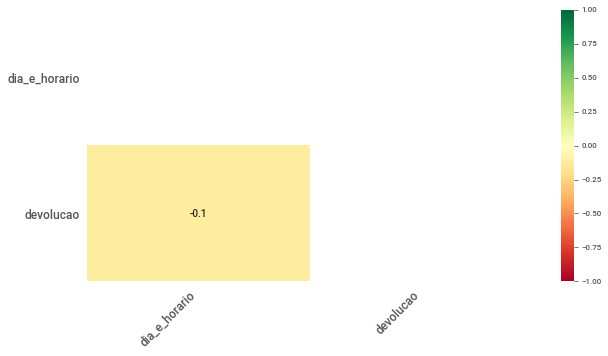

In [116]:
msno.heatmap(df_junto_lateral, cmap="RdYlGn", figsize=(10,5), fontsize=12);

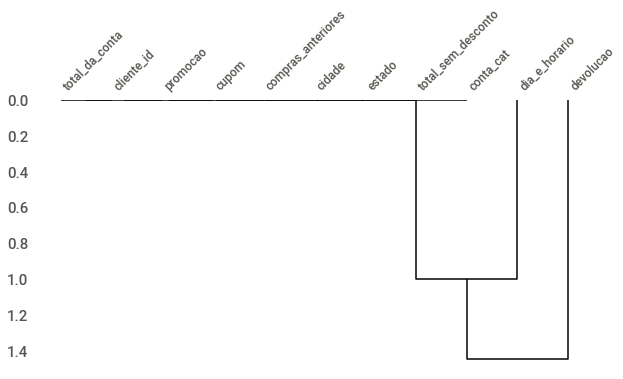

In [117]:
msno.dendrogram(df_junto_lateral, figsize=(10,5), fontsize=12);

<a name="alterando_quadros">
    <H1>Alterando quadros de dados</H1>
</a>

In [188]:
df

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [190]:
df.transpose()

,0,1,2,3,4,5,6,7,8
cliente_id,3564,4536,9730,6574,2534,5368,2356,6345,6457
dia_e_horario,2020-10-01,2020-10-15,2020-11-03,2020-11-14,2020-12-03,2020-12-20,2021-01-04,NaN,2021-02-01
total_da_conta,235.8,3452.0,1894.0,8936.0,573.5,2366.0,6344.0,984.0,1723.0
promocao,True,False,True,True,False,True,False,True,False
cupom,0.1,0.1,0.0,0.1,0.0,0.15,0.05,0.1,0.05
compras_anteriores,2,3,0,4,0,3,2,1,3
cidade,São Paulo,São Paulo,Rio de Janeiro,Contagem,Osasco,Volta Redonda,Belo Horizonte,São Paulo,Rio de Janeiro
estado,SP,SP,RJ,MG,SP,RJ,MG,SP,RJ
total_sem_desconto,259.2,3798.0,1894.0,9830.0,573.5,2720.0,6660.0,1082.0,1809.0
conta_cat,barato,caro,medio,caro,barato,caro,caro,medio,medio


In [191]:
df.T

,0,1,2,3,4,5,6,7,8
cliente_id,3564,4536,9730,6574,2534,5368,2356,6345,6457
dia_e_horario,2020-10-01,2020-10-15,2020-11-03,2020-11-14,2020-12-03,2020-12-20,2021-01-04,NaN,2021-02-01
total_da_conta,235.8,3452.0,1894.0,8936.0,573.5,2366.0,6344.0,984.0,1723.0
promocao,True,False,True,True,False,True,False,True,False
cupom,0.1,0.1,0.0,0.1,0.0,0.15,0.05,0.1,0.05
compras_anteriores,2,3,0,4,0,3,2,1,3
cidade,São Paulo,São Paulo,Rio de Janeiro,Contagem,Osasco,Volta Redonda,Belo Horizonte,São Paulo,Rio de Janeiro
estado,SP,SP,RJ,MG,SP,RJ,MG,SP,RJ
total_sem_desconto,259.2,3798.0,1894.0,9830.0,573.5,2720.0,6660.0,1082.0,1809.0
conta_cat,barato,caro,medio,caro,barato,caro,caro,medio,medio


<a name="crosstab">
    <H2>Alterando quadros de dados com <code>crosstab</code></H2>
</a>

In [118]:
pd.crosstab(df_junto_lateral.estado, df_junto_lateral.promocao)

promocao,False,True
estado,,
MG,1,2
RJ,1,3
SP,3,3


In [119]:
pd.crosstab(df_junto_lateral.cidade, df_junto_lateral.cupom)

cupom,0.0,0.05,0.1,0.15
cidade,,,,
Belo Horizonte,0,1,1,0
Contagem,0,0,1,0
Osasco,1,0,0,0
Rio de Janeiro,2,1,0,0
São Paulo,0,0,5,0
Volta Redonda,0,0,0,1


<a name="groupby">
    <H2>Alterando quadros de dados com <code>groupby</code></H2>
</a>

O método `.groupby()` é uma forma muito útil de alterar o formato do seus quadros de dados. Ele permite *agrupar por* (group by) uma ou mais colunas, trazer resultado delas ou de outras colunas e realizar operações. A lógica por trás do `.groupby()` é o mecanismo **separar**-**aplicar**-**combinar** (*split-apply-combine*). Com essa mecânica, uma coluna (ou mais de uma) é usada para separar de forma categórica os resultados (**separar**), em seguida, alguma operação de agregação é aplicado em outra(s) colunas(s) (**aplicar**), e por fim, são combinados (**combinar**) novamente num quadro de dados: 

<img src="data/split_apply_combine.png">

A sintaxe básica é:

<img src="data/groupby.png" width=800>

Os principais métodos de agregação são:

* `.count()`: Número de valores válidos (sem `NaN`)
* `.sum()`: Soma dos valores
* `.mean()`: Média aritmética dos valores
* `.median()`: Mediana dos valores
* `.min()`: Valor mínimo
* `.max()`: Valor máximo
* `.std()`: Desvio-padrão
* `.var()`: Variância

Vamos começar com um exemplo simples - agrupar por `estado`, retornar o `total_da_conta` (agora por `estado`) e apresentar a média:

In [175]:
df_agrupado = (df
               .groupby("estado")
               ["total_da_conta"]
               .mean()
              )
df_agrupado

estado
MG    7640.000000
RJ    1994.333333
SP    1311.325000
Name: total_da_conta, dtype: float64

Mas fica bem feio, porque na verdade, o `pandas` nos retorna uma série:

In [159]:
type(df_agrupado)

pandas.core.series.Series

Você pode retornar a um quadro de dados, passando o método, `.reset_index()`:

In [174]:
df_agrupado = (df
               .groupby("estado")
               ["total_da_conta"]
               .mean()
               .reset_index()
              )
df_agrupado

,estado,total_da_conta
0,MG,7640.000000
1,RJ,1994.333333
2,SP,1311.325000


Você pode agregar por mais de uma coluna (aqui, `estado` e `cidade`) e selecionar resultados de mais de uma coluna (`total_da_conta` e `total_sem_desconto`). Lembre-se somente de colocar os valores em listas:

In [187]:
df_agrupado = (df
               .groupby(["estado", "cidade"])
               [["total_da_conta", "total_sem_desconto"]]
               .mean()
               .reset_index()
              )
df_agrupado

,estado,cidade,total_da_conta,total_sem_desconto
0,MG,Belo Horizonte,6344.000000,6660.000000
1,MG,Contagem,8936.000000,9830.000000
2,RJ,Rio de Janeiro,1808.500000,1851.500000
3,RJ,Volta Redonda,2366.000000,2720.000000
4,SP,Osasco,573.500000,573.500000
5,SP,São Paulo,1557.266667,1713.066667


Você também pode fazer múltiplas operações de agregação, mas aqui não cabe inserir lista. Na verdade, você substitui pelo método `.agg()` e passa as operações como argumentos em foramto `str`:

In [181]:
(df
 .groupby(["estado", "cidade"])
 ["total_sem_desconto"]
 .agg(["sum", "std"])
 .fillna(0)
 #.reset_index()
)

sum          std
estado cidade                             
MG     Belo Horizonte  6660.0     0.000000
       Contagem        9830.0     0.000000
RJ     Rio de Janeiro  3703.0    60.104076
       Volta Redonda   2720.0     0.000000
SP     Osasco           573.5     0.000000
       São Paulo       5139.2  1851.880183

Caso você queira ter mais de uma coluna como resultado, com agregações diferentes, vá direto para o método `.agg()` e passe um dicionário de `str` com `"coluna":"agregacao"`:

In [235]:
(df
 .groupby("estado")
 .agg({"total_da_conta":"sum", 
       "cupom":"mean"})
 .fillna(0)
 #.reset_index()
)

,total_da_conta,cupom
estado,,
MG,15280.0,0.075000
RJ,5983.0,0.066667
SP,5245.3,0.075000


Você também pode usar `.agg()` direto com uma lista de agregações, e retorna todas as colunas por agregação:

In [236]:
df.groupby("estado").agg(["sum", "mean", "std"])

cliente_id                       total_da_conta               \
              sum     mean          std            sum         mean   
estado                                                                
MG           8930  4465.00  2982.576403        15280.0  7640.000000   
RJ          21555  7185.00  2270.297117         5983.0  1994.333333   
SP          16979  4244.75  1621.312508         5245.3  1311.325000   

                    promocao                     cupom                      \
                std      sum      mean       std   sum      mean       std   
estado                                                                       
MG      1832.820777        1  0.500000  0.707107  0.15  0.075000  0.035355   
RJ       333.035033        2  0.666667  0.577350  0.20  0.066667  0.076376   
SP      1459.539981        2  0.500000  0.577350  0.30  0.075000  0.050000   

       compras_anteriores                total_sem_desconto            \
                      sum mean       std                sum      mean   
estado                                                                  
MG                      6  3.0  1.414214            16490.0  8245.000   
RJ                      6  2.0  1.732051             6423.0  2141.000   
SP                      6  1.5  1.290994             5712.7  1428.175   

                     
                std  
estado               
MG      2241.528496  
RJ       503.226589  
SP      1615.846483

Você pode de forma rápida sumarizar grupos com `.groups`. As listas indicam as linhas/rótulos pertencentes a cada grupo:

In [229]:
df.groupby("estado").groups

{'MG': [3, 6], 'RJ': [2, 5, 8], 'SP': [0, 1, 4, 7]}

No entando requisitar `.groups` em quadros grandes não é uma ideia muito boa porque haverá informação demais. Pode ser mais interessante extrair o número de grupos, com `.ngroups`:

In [231]:
df.groupby("estado").ngroups

3

Se preferir uma forma mais organizada já com contagem por grupos, use o método `.size()`:

In [230]:
df.groupby("estado").size()

estado
MG    2
RJ    3
SP    4
dtype: int64

Você pode selecionar grupos nos dados com `.get_group()`:

In [194]:
df.groupby("estado").get_group("MG")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro


Para elementos agrupáveis (que tenham mais de uma linha, podendo ser agrupados em uma), você pode usar `.first()` e retorna a primeira linha de cada grupo.

In [221]:
df.groupby("estado").first()#.sort_values("total_da_conta")

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,total_sem_desconto,conta_cat
estado,,,,,,,,,
SP,3564,2020-10-01,235.8,True,0.1,2,São Paulo,259.2,barato
RJ,9730,2020-11-03,1894.0,True,0.0,0,Rio de Janeiro,1894.0,medio
MG,6574,2020-11-14,8936.0,True,0.1,4,Contagem,9830.0,caro


Este tipo de caso é útil, por exemplo, quando você quer primeiro ordenar os grupos (por uma coluna específica) e depois extrair a primeira posição com `.grouppy()`:

In [225]:
(df
 .sort_values("total_da_conta", 
               ascending=False)
).groupby("estado").first()

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,total_sem_desconto,conta_cat
estado,,,,,,,,,
MG,6574,2020-11-14,8936.0,True,0.10,4,Contagem,9830.0,caro
RJ,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,2720.0,caro
SP,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,3798.0,caro


Você também pode usar `.last()` e retorna a útlima linha de cada grupo:

In [215]:
df.groupby("promocao").last()

,cliente_id,dia_e_horario,total_da_conta,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
promocao,,,,,,,,,
False,6457,2021-02-01,1723.0,0.05,3,Rio de Janeiro,RJ,1809.0,medio
True,6345,2020-12-20,984.0,0.10,1,São Paulo,SP,1082.0,medio


Da mesma forma é possível selecionar os piores resultados por grupo combinando `.sort_values()` com `.groupby()`:

In [228]:
(df.sort_values("compras_anteriores", 
                ascending=False)
).groupby("cidade").last()

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,estado,total_sem_desconto,conta_cat
cidade,,,,,,,,,
Belo Horizonte,2356,2021-01-04,6344.0,False,0.05,2,MG,6660.0,caro
Contagem,6574,2020-11-14,8936.0,True,0.10,4,MG,9830.0,caro
Osasco,2534,2020-12-03,573.5,False,0.00,0,SP,573.5,barato
Rio de Janeiro,9730,2020-11-03,1894.0,True,0.00,0,RJ,1894.0,medio
São Paulo,6345,2020-10-01,984.0,True,0.10,1,SP,1082.0,medio
Volta Redonda,5368,2020-12-20,2366.0,True,0.15,3,RJ,2720.0,caro


Para elementos agrupáveis, você pode usar `.nth()` passando `x` como argumento e retona as `x` primeiras linhas.

In [218]:
df.groupby("estado").nth(1) #cada grupo tem pelo menos 1

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,total_sem_desconto,conta_cat
estado,,,,,,,,,
MG,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,6660.0,caro
RJ,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,2720.0,caro
SP,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,3798.0,caro


In [219]:
df.groupby("estado").nth(2) #só dois grupos tem pelo menos 2

,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,total_sem_desconto,conta_cat
estado,,,,,,,,,
RJ,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,1809.0,medio
SP,2534,2020-12-03,573.5,False,0.00,0,Osasco,573.5,barato


##    Alterando quadros de dados com pivot_table

In [122]:
(df_junto_lateral
 .pivot_table(index="cidade", 
              aggfunc={"compras_anteriores":"sum", 
                       "total_sem_desconto":"mean"})
)

,compras_anteriores,total_sem_desconto
cidade,,
Belo Horizonte,6,8245.000000
Contagem,4,9830.000000
Osasco,0,573.500000
Rio de Janeiro,3,1865.666667
São Paulo,11,1839.280000
Volta Redonda,3,2720.000000


##    Alterando quadros de dados com stack e unstack

In [149]:
df.groupby("estado").agg(sum).stack().reset_index()

,estado,level_1,0
0,MG,cliente_id,8930.00
1,MG,total_da_conta,15280.00
2,MG,promocao,1.00
3,MG,cupom,0.15
4,MG,compras_anteriores,6.00
...,...,...,...
13,SP,total_da_conta,5245.30
14,SP,promocao,2.00
15,SP,cupom,0.30
16,SP,compras_anteriores,6.00


In [123]:
(df
 .groupby(["estado", "cidade"])
 ["total_sem_desconto"]
 .agg(["sum", "std"])
)

sum          std
estado cidade                             
MG     Belo Horizonte  6660.0          NaN
       Contagem        9830.0          NaN
RJ     Rio de Janeiro  3703.0    60.104076
       Volta Redonda   2720.0          NaN
SP     Osasco           573.5          NaN
       São Paulo       5139.2  1851.880183

In [124]:
(df
 .groupby(["estado", "cidade"])
 ["total_sem_desconto"]
 .agg(["sum", "std"])
 .unstack()
)

sum                                                         \
cidade Belo Horizonte Contagem Osasco Rio de Janeiro São Paulo Volta Redonda   
estado                                                                         
MG             6660.0   9830.0    NaN            NaN       NaN           NaN   
RJ                NaN      NaN    NaN         3703.0       NaN        2720.0   
SP                NaN      NaN  573.5            NaN    5139.2           NaN   

                  std                                              \
cidade Belo Horizonte Contagem Osasco Rio de Janeiro    São Paulo   
estado                                                              
MG                NaN      NaN    NaN            NaN          NaN   
RJ                NaN      NaN    NaN      60.104076          NaN   
SP                NaN      NaN    NaN            NaN  1851.880183   

                      
cidade Volta Redonda  
estado                
MG               NaN  
RJ               NaN  
SP               NaN

In [138]:
df_junto_lateral.groupby(["estado", "cidade"])["promocao"].sum().unstack()

cidade,Belo Horizonte,Contagem,Osasco,Rio de Janeiro,São Paulo,Volta Redonda
estado,,,,,,
MG,1.0,1.0,NaN,NaN,NaN,NaN
RJ,NaN,NaN,NaN,2.0,NaN,1.0
SP,NaN,NaN,0.0,NaN,3.0,NaN


# Alterando estilo visual de quadros de dados


<a name="mitosheet_uso">
    <H1>Alterando quadros com <code>mitosheet</code></H1>
</a>

A biblioteca `mitosheet` permite fazer as operações que vimos anteriomente por meio de uma interface gráfica. Vamos importar um quadro de dados criado anteriormente e explorar:

In [126]:
import mitosheet
mitosheet.sheet(df_junto_lateral, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-516499b0-0206-4c41-937d-4bd8ab1f26c1", "code": {"imports…

In [127]:
# MITO CODE START (DO NOT EDIT)

from mitosheet import * # Import necessary functions from Mito
register_analysis('UUID-5a2eed17-b35b-4241-9639-ade775043e92') # Let Mito know which analysis is being run

# Pivoted df_junto_lateral into df2
unused_columns = df_junto_lateral.columns.difference(set(['estado']).union(set(['promocao'])).union(set({'total_da_conta'})))
tmp_df = df_junto_lateral.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['estado'],
    columns=['promocao'],
    values=['total_da_conta'],
    aggfunc={'total_da_conta': ['sum']}
)

# Flatten the column headers
pivot_table.columns = [flatten_column_header(col) for col in pivot_table.columns.values]

# Reset the column name and the indexes
df2 = pivot_table.reset_index()

# Deleted dataframe df2
del df2

  
# MITO CODE END (DO NOT EDIT)

Você pode encontrar mais dados sobre o `mitosheet` no site oficial.

<a name="dtale_uso">
    <H1>Alterando quadros com <code>dtale</code></H1>
</a>



In [128]:
dtale.show(df_junto_lateral)

<a name="outros">
    <H1>Outros pacotes como alternativas a <code>pandas</code> e/ou para <code>big data</code></H1>
</a>

Existems outras bibliotecas mais adequadas como alternativas a`pandas` e/ou para `big data`. Entre essas, é muito fácil encontrar informações sobre as seguintes:

* Modin
* dask
* pyspark
* Vaex

Vamos conhecer uma delas, a biblioteca `Modin`.

<a name="modin">
    <H2><code>Big Data</code> com <code>Modin</code> ao invés de <code>pandas</code></H2>
</a>

Entre essas bibliotecas acima, há sempre vantagens e desvantagens, que ficam fora do escopo da nossa aula por ser uma discussão mais técnica. Vou deixar [esse texto](https://towardsdatascience.com/beyond-pandas-spark-dask-vaex-and-other-big-data-technologies-battling-head-to-head-a453a1f8cc13) e mais [esse](https://www.datarevenue.com/en-blog/pandas-vs-dask-vs-vaex-vs-modin-vs-rapids-vs-ray) para vocês lerem análises comparativas. 

<img src="data/modin.png" width = 400>


Essa biblioteca faz um uso mais eficiente de um *notebook*, por exemplo, ao usar mais *cores* do que o `pandas`. Além disso, é escalável para diversos computadores em rede ou nuvem. Internamente, o `Modin` usa *cores* do processador que não são usados pelo `pandas`, aumentando a capacidade e paralelizando as operações:

<img src="data/modin2.png" width=800>

*Reprodução do [site oficial](https://modin.readthedocs.io/en/latest/comparisons/pandas.html) da biblioteca*

Em resumo, vamos ver a biblioteca `Modin` por um motivo somente, que é a sua grande vantagem: o fato de ter sintaxe similar ao `pandas`.  Para não ser mentiroso, não é *similar* e sim *igual*! A lógica do `Modin` é possibilitar usar dados muito maiores sem ter que aprender uma nova sintaxe. 
A lógica por trás do `Modin` é muito simples: você não precisa alterar o seu código, já que todas as funções não mudam no código:

In [135]:
#essa é a manha, assim vc não muda nada no seu código:
import modin.pandas as pd

In [131]:
df_modin = pd.read_csv("data/contas_limpo_3.csv")
df_modin

,Unnamed: 0,cliente_id,dia_e_horario,total_da_conta,promocao,cupom,compras_anteriores,cidade,estado,total_sem_desconto,conta_cat
0,0,3564,2020-10-01,235.8,True,0.10,2,São Paulo,SP,259.2,barato
1,1,4536,2020-10-15,3452.0,False,0.10,3,São Paulo,SP,3798.0,caro
2,2,9730,2020-11-03,1894.0,True,0.00,0,Rio de Janeiro,RJ,1894.0,medio
3,3,6574,2020-11-14,8936.0,True,0.10,4,Contagem,MG,9830.0,caro
4,4,2534,2020-12-03,573.5,False,0.00,0,Osasco,SP,573.5,barato
5,5,5368,2020-12-20,2366.0,True,0.15,3,Volta Redonda,RJ,2720.0,caro
6,6,2356,2021-01-04,6344.0,False,0.05,2,Belo Horizonte,MG,6660.0,caro
7,7,6345,NaN,984.0,True,0.10,1,São Paulo,SP,1082.0,medio
8,8,6457,2021-02-01,1723.0,False,0.05,3,Rio de Janeiro,RJ,1809.0,medio


In [132]:
df_modin.groupby("estado").agg(sum)

,Unnamed: 0,cliente_id,total_da_conta,promocao,cupom,compras_anteriores,total_sem_desconto
estado,,,,,,,
MG,9,8930,15280.0,1,0.15,6,16490.0
RJ,15,21555,5983.0,2,0.20,6,6423.0
SP,12,16979,5245.3,2,0.30,6,5712.7


Executing shutdown due to inactivity...


2021-11-18 21:47:57,203 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-11-18 21:48:09,520 - INFO     - Executing shutdown...


In [134]:
(df_modin.pivot_table(
    index=['estado'],
    columns=['promocao'],
    values=['total_da_conta'],
    aggfunc={'total_da_conta': ['sum']})
)

sum        
promocao   False    True
estado                  
MG        6344.0  8936.0
RJ        1723.0  4260.0
SP        4025.5  1219.8

> **Dica**: A biblioteca `Modin` foi sendo construída por Pareto (da função mais usada no `pandas` para as menos). Atualmente, mais de 90% do `pandas` já está implementando no `Modin`, então se seu objetivo for utilizar sempre, é bom se ater às partes mais usuais do `pandas`.

<a name="interessantes">
    <H2>Outros pacotes interessantes</H2>
</a>

Apesar de ser muito bom conhecer como desenvolver uma análise de dados exploratória (EDA) na mão, mas há situações que justifiquem o uso de ferramentas prontas. Para facilitar a automatização de EDA, há algumas opções interessantes em `Python`, que, por tempo, não poderemos explorar. Fica a lição de casa de buscar um pouco mais sobre essas bibliotecas:
* Dora
* dataprep
* Pandas GUI
* TPOT
* pandas_summary
* Exploripy
* Bamboolib (Edaviz)
* Holoviews
* Visidata
* Scattertext

<a name="visualizacao">
    <H1>Visualização</H1>
</a>

Vou criar uma aula só de visualização depois, mas sinceramente, os gráficos padrões são suficientes em 90% dos casos - por isso eles são os padrões de visualização. Existem diversas bibliotecas de visualização no `Python` integráveis ao `pandas`, entre elas:

* `matplotlib`: A mais conhecida, mas mais de baixo nível
* `seaborn`: Criada como uma versão de alto nível da `matplotlib`
* `bokeh`: Criada para ser um meio termo entre o baixo nível do `matplotlib` e `seaborn`
* `plotly`: Biblioteca de visualizações estáticas e dinâmicas - com API para `Python`, `R` e `Julia`
* `plotnine`: Uma versão em `Python` da biblioteca `ggplot2` do `R`

... entre muitas outras

Independentemente de qual você for usar, esse site eu recomendo fortemente ([`Python` Graph Gallery](https://www.python-graph-gallery.com/)). Esse site reúne "receitas" de como fazer todo tipo de gráficos em Python. Na aula de visualização vamos focar em alguns.

<img src="data/gallery.png" width=500>



Hoje vamos usar o básico de visualizações do `pandas`. Vamos voltar ao `pandas` porque `pd` no momento é abreviaçaõ do `modin.pandas`:

In [243]:
import pandas as pd

O `pandas` por padrão faz gráficos por meio da biblioteca `matplotlib`. Você pode usar essa biblioteca para fazer visualizações mais complexas, mas para gráficos triviais, o uso dela no `pandas` é mais fácil. De toda forma, você precisa também importar. 

O comando mágico `%matplotlib inline` faz com que os gráficos sejam apresentados direto no *notebook*. Adicione `;` ao fim de cada linha de plotagem para esconder o objeto `matplotlib`.

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline

O `pandas` dá suporte para os seguintes tipos de gráficos:

* `.area()`
* `.bar()`
* `.barh()`
* `.box()`
* `.hexbin()`
* `.hist()`
* `.kde()`
* `.density()`
* `.line()`
* `.pie()`
* `.scatter()`

Vamos ver alguns exemplos de gráficos mais comuns. Primeiro o velho e bom *histograma*. Cada coluna representa a probabilidade de um valor cair naquela faixa.

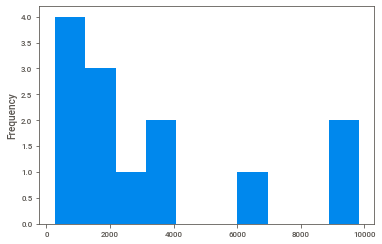

In [300]:
(df_junto_lateral
 .total_sem_desconto
 .plot(kind="hist")
);

Uma visão "suavizada" do histograma é por meio de função densidade (*KDE - Kernel density estimation*):

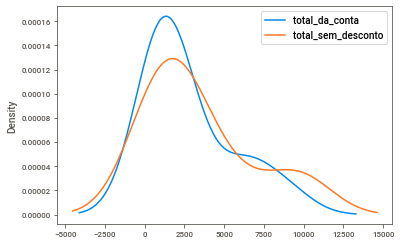

In [302]:
#df_junto_lateral[["total_da_conta", "total_sem_desconto"]].plot(kind="kde") é igual

(df_junto_lateral
 [["total_da_conta", "total_sem_desconto"]]
 .plot
 .kde()
);

A visualização mais clássica da estatística, o diagrama de caixa (*boxplot*):

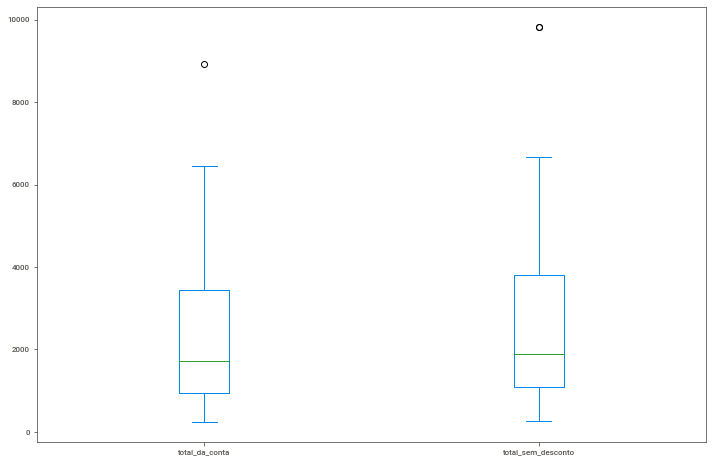

In [304]:
(df_junto_lateral
 [["total_da_conta", "total_sem_desconto"]]
 .plot
 .box(figsize=(12,8))
);

Não pode faltar os gráficos de pontos (*scatterplot*):

<AxesSubplot:xlabel='compras_anteriores', ylabel='total_sem_desconto'>

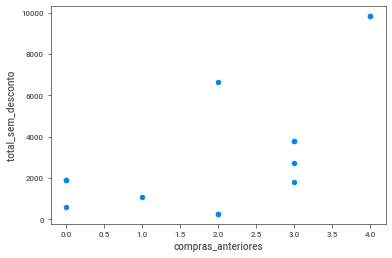

In [305]:
(df_junto_lateral
 .plot(x="compras_anteriores", 
       y="total_sem_desconto", 
       kind="scatter")
)

Também podemos só usar `.plot()` para extrair um gráfico de linhas:

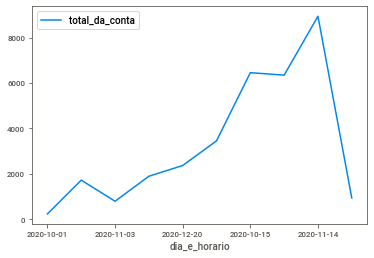

In [311]:
(df_junto_lateral
 .dropna()
 .sort_values(by="total_sem_desconto")
 .plot(x="dia_e_horario", y="total_da_conta")
);

Para dados agrupados, é muito comum usar um gráfico de barras:

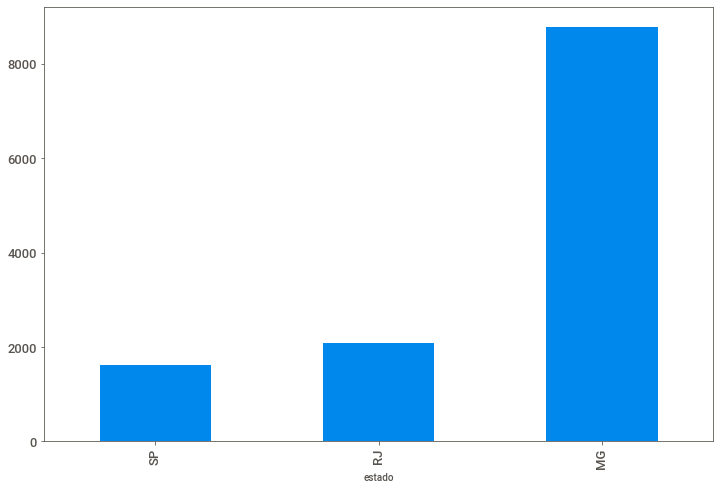

In [323]:
(df_junto_lateral
 .groupby("estado")
 ["total_sem_desconto"]
 .mean()
 .sort_values()
).plot(kind="bar", 
       figsize=(12,8), 
       fontsize=13
      );

O tipo `barh` transforma em barras horizontais:

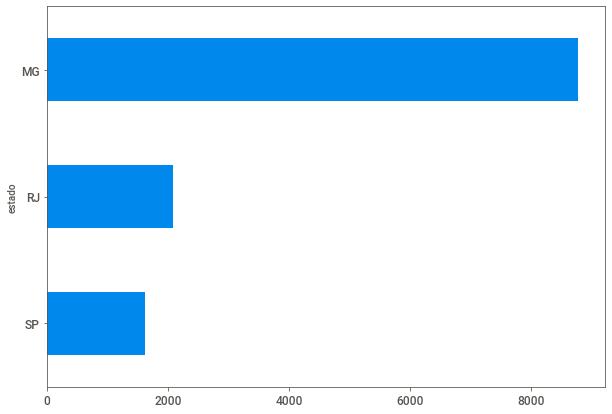

In [320]:
(df_junto_lateral
 .groupby("estado")
 ["total_sem_desconto"]
 .mean()
 .sort_values()
).plot(kind="barh", 
       figsize=(10,7),
       fontsize=12
      );

Para terminar, o velha e *não tão bom assim* gráfico de pizza:

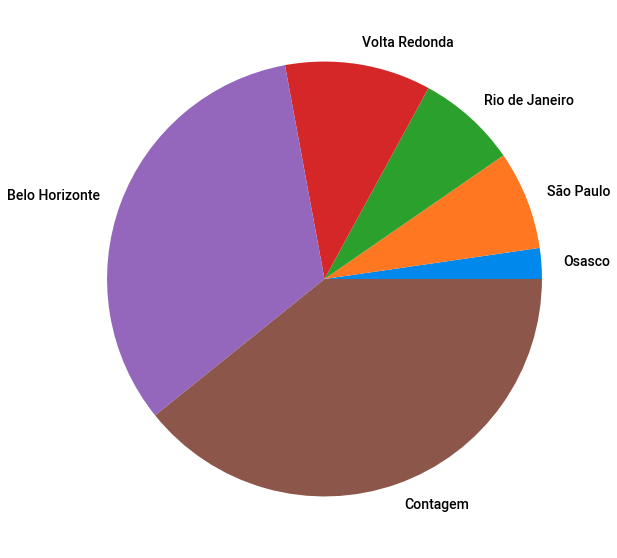

In [319]:
(df_junto_lateral
 .groupby("cidade")
 ["total_sem_desconto"]
 .mean()
 .sort_values()
).plot(kind="pie", 
       label="", 
       figsize=(10,10),
       fontsize=14
      );